In [1]:
import pandas as pd

from matplotlib import pyplot as plt

import seaborn as sns

import matplotlib as mpl
mpl.rcParams.update(mpl.rcParamsDefault)

sns.set_theme()



sns.set(font_scale=1, rc={'text.usetex': True, 'text.latex.preamble': r"\usepackage{bm} \usepackage{amsmath}"})
# sns.set(rc={'text.usetex': True, 'text.latex.preamble': latex_preamble})

sns.set_style('whitegrid')
plt.rcParams.update({
    'text.usetex': True,
    'font.family': 'serif',
})

sns.set_context("poster")

%matplotlib inline



In [2]:
file_path = 'final_pandas_dataframes'

In [3]:
markers = ['o','s','^','d','*']
filepath = 'figures_paper/'

def load_pandas_df(file_path, file_name):
    file = file_path + '/' + file_name
    df = pd.read_pickle(file)
    
    return df
    
def filter_bound_2_3_out(df):
    
    df = df.astype({'depth': int, 'width': int, 'input_dim':int, 'output_dim':int})
    df.replace({'H_o_cond_bound1': 'upper bound', 'H_o_cond': r'$\kappa(\widehat{G}_O)$'}, inplace=True)
    df.replace({'sequential': 'FCNN', 'lin_residual_network': 'ResNet'}, inplace=True)

    df = df[df['type'] != 'H_o_cond_bound2']
    df = df[df['type'] != 'H_o_cond_bound3']
    return df

def filter_bound_3_out(df):
    
    df = df.astype({'width': int, 'input_dim':int, 'output_dim':int})
    df.replace({'H_o_cond_bound2': 'loose upper bound', 'H_o_cond_bound1': 'upper bound', 'H_o_cond': r'$\kappa(\widehat{G}_O)$'}, inplace=True)
    df.replace({'sequential': 'FCNN', 'lin_residual_network': 'ResNet'}, inplace=True)

#     df = df[df['type'] != 'H_o_cond_bound2']
    df = df[df['type'] != 'H_o_cond_bound3']
    return df

def filter_bound_1_out(df):
    
    df = df[df['type'] != 'upper bound']
    return df
        
def make_lineplot_BN_comparison(df, title, log_scale=False, filename=None, save=False):
    
    f = plt.figure(figsize=(8,5))
    
    g = sns.lineplot(df, x='width',y='H_o_cond', alpha=0.7, hue='batchnorm', style='batchnorm', markers=markers)
    g.set_xlabel('Width $m$')
    g.set_ylabel('$\kappa(\widehat{G}_O)$')
#     g.add_legend(title='') 

    g.set_title(title)
#     g.fig.subplots_adjust(top=0.90)

#     if log_scale:
#         g.set(yscale='log')
        
    if save==True:
        f.savefig(filepath+ filename + '.pdf', bbox_inches='tight')
    
    

In [12]:
training_infos.replace({'pruned_weights': 'pruned weights'}, inplace=True)
training_infos

modelname  epoch   loss_mb    acc_mb       loss    acc  full_grad_norm  \
0     ResNet32      0  2.522794  0.078125  41.187256  0.088        6.879318   
1     ResNet32      0  2.375124  0.171875  41.187256  0.088        6.436945   
2     ResNet32      0  2.604136  0.078125  41.187256  0.088        6.472061   
3     ResNet32      0  2.532304  0.156250  41.187256  0.088        6.053850   
4     ResNet32      0  2.908307  0.093750  41.187256  0.088        5.723793   
...        ...    ...       ...       ...        ...    ...             ...   
1595  ResNet32     99  1.206048  0.515625  19.586666  0.547        0.944916   
1596  ResNet32     99  1.091857  0.546875  19.586666  0.547        0.763724   
1597  ResNet32     99  1.160569  0.562500  19.586666  0.547        0.992754   
1598  ResNet32     99  1.280861  0.562500  19.586666  0.547        0.867845   
1599  ResNet32     99  1.306438  0.525000  19.586666  0.547        1.256583   

      pruned_weights  
0                0.0  
1                0.0  
2                0.0  
3                0.0  
4                0.0  
...              ...  
1595             0.8  
1596             0.8  
1597             0.8  
1598             0.8  
1599             0.8  

[8000 rows x 8 columns]

### Training subsampled Cifar10 on LinearNet

In [4]:
def load_training_info(experiment, init, BS, lr, m, L):
    
    fn = f'training_information_{experiment}_cifar-10_whitened_init={init}_d=192_m=[{m}]_L=[{L}]_linear_SGD_lr={lr}_BS={BS}.pkl'

    df = load_pandas_df(file_path, fn)
    df = df.astype({'acc': float})
    
    return df

In [5]:
BS = 256
lrs = [0.2]
L = 2
m = 500
inits = 3
experiment = 'training_n=1000_xavier_init_downsample_fac=4'

dfs = []
for lr in lrs:
    for init in range(inits):
        df = load_training_info(experiment, init, BS, lr, m, L)
        df.insert(0,'lr',lr)
        dfs.append(df)
        
df_training_info = pd.concat(dfs)

In [7]:
df_training_info_fil = df_training_info[df_training_info['epoch'] %50 == 0]

In [11]:
df_training_info_fil

lr  width  depth activ_f   epoch      loss  grad_norm_squared    acc  \
0      0.2  500.0    2.0  linear     0.0  0.101106                NaN  0.095   
1      0.2  500.0    2.0  linear     0.0  0.101091                NaN  0.095   
2      0.2  500.0    2.0  linear     0.0  0.101076                NaN  0.094   
3      0.2  500.0    2.0  linear     0.0  0.101060                NaN  0.095   
200    0.2  500.0    2.0  linear    50.0  0.098220                NaN  0.203   
...    ...    ...    ...     ...     ...       ...                ...    ...   
19603  0.2  500.0    2.0  linear  4900.0  0.070955                NaN  0.648   
19800  0.2  500.0    2.0  linear  4950.0  0.070956                NaN  0.648   
19801  0.2  500.0    2.0  linear  4950.0  0.070956                NaN  0.648   
19802  0.2  500.0    2.0  linear  4950.0  0.070956                NaN  0.648   
19803  0.2  500.0    2.0  linear  4950.0  0.070955                NaN  0.648   

       full_grad_norm  
0            0.014862  
1            0.014410  
2            0.014808  
3            0.015515  
200          0.014382  
...               ...  
19603        0.016136  
19800        0.016313  
19801        0.015308  
19802        0.015843  
19803        0.016136  

[1200 rows x 9 columns]

In [18]:
fn = 'outer_prod_hessian_information_training_n=1000_xavier_init_downsample_fac=4_cifar-10_whitened_m=500_L=[2]_lr=[0.2]_BS=256.pkl'
df_hess_info_LinNetTr = load_pandas_df(file_path, fn)

df_hess_info_LinNetTr = filter_bound_2_3_out(df_hess_info_LinNetTr)

df_hess_info_LinNetTr

/Users/zhao0005/miniconda3/lib/python3.10/site-packages/pandas/core/array_algos/replace.py:86: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  op = lambda x: operator.eq(x, b)


dataset network  cond_cov_xx  input_dim  output_dim  width  depth  \
0    cifar-10    FCNN          1.0        192          10    500      2   
1    cifar-10    FCNN          1.0        192          10    500      2   
3    cifar-10    FCNN          1.0        192          10    500      2   
4    cifar-10    FCNN          1.0        192          10    500      2   
6    cifar-10    FCNN          1.0        192          10    500      2   
..        ...     ...          ...        ...         ...    ...    ...   
451  cifar-10    FCNN          1.0        192          10    500      2   
453  cifar-10    FCNN          1.0        192          10    500      2   
454  cifar-10    FCNN          1.0        192          10    500      2   
456  cifar-10    FCNN          1.0        192          10    500      2   
457  cifar-10    FCNN          1.0        192          10    500      2   

    activ_f        lr  epoch                     type      value  \
0    linear  0.200000      0  $\kappa(\widehat{G}_O)$   8.754954   
1    linear  0.200000      0              upper bound  10.202193   
3    linear  0.200000    100  $\kappa(\widehat{G}_O)$   8.575050   
4    linear  0.200000    100              upper bound   9.857433   
6    linear  0.200000    200  $\kappa(\widehat{G}_O)$   8.583662   
..      ...       ...    ...                      ...        ...   
451  linear  0.200000   4800              upper bound   6.844631   
453  linear  0.200000   4900  $\kappa(\widehat{G}_O)$   6.659021   
454  linear  0.200000   4900              upper bound   6.844943   
456  linear  0.200000   4999  $\kappa(\widehat{G}_O)$   6.659356   
457  linear  0.200000   4999              upper bound   6.845277   

                                          H_o_spectrum  sparsity  
0    [4.647983630061277e-07, 4.766731109587699e-07,...       1.0  
1    [4.647983630061277e-07, 4.766731109587699e-07,...       1.0  
3    [4.776357592807417e-07, 4.897340778796542e-07,...       1.0  
4    [4.776357592807417e-07, 4.897340778796542e-07,...       1.0  
6    [5.182700618202695e-07, 5.308069318490396e-07,...       1.0  
..                                                 ...       ...  
451  [1.918134956175591e-06, 1.925792150335604e-06,...       1.0  
453  [1.918030660546845e-06, 1.925687749620918e-06,...       1.0  
454  [1.918030660546845e-06, 1.925687749620918e-06,...       1.0  
456  [1.9179198866401805e-06, 1.925576901424676e-06...       1.0  
457  [1.9179198866401805e-06, 1.925576901424676e-06...       1.0  

[306 rows x 14 columns]

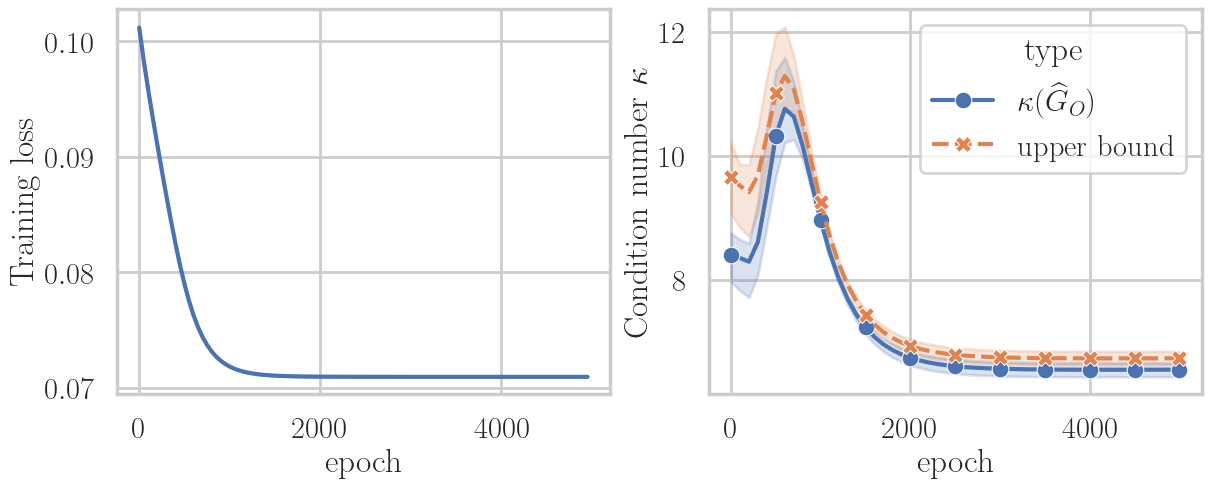

In [28]:
f = plt.figure(figsize=(14,5))

plt.subplot(121)

sns.lineplot(df_training_info_fil, x='epoch', y='loss', markevery=20, legend=False)

# plt.title('ResNet32, Cifar10, n=1000')
plt.ylabel('Training loss')

# plt.yscale('log')

plt.subplot(122)

sns.lineplot(df_hess_info_LinNetTr, x='epoch', y='value', hue='type', style='type', markers=True, markevery=5)

plt.ylabel('Condition number $\kappa$')


plt.savefig('training_loss_and_condition_number_during_training_cifar10_d=192_m=500_n=2000.pdf', bbox_inches='tight')

### Sparsity experiments

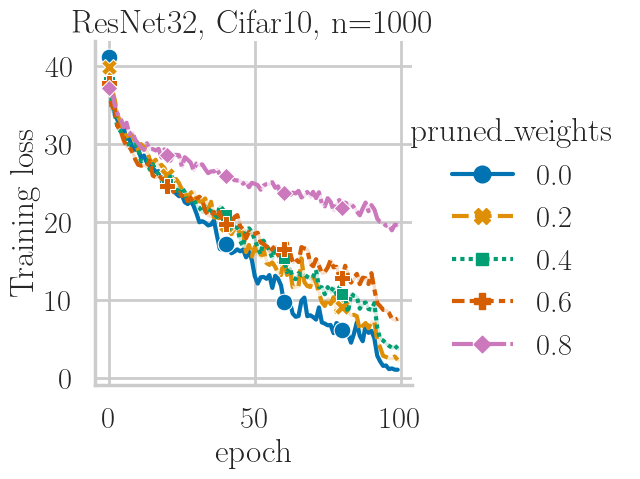

In [13]:
fn = 'training_information_ResNet32_pruned_weights.pkl'
training_infos = load_pandas_df(file_path, fn)
training_infos.replace({'pruned_weights': 'pruned weights'}, inplace=True)
            
sns.relplot(training_infos, x='epoch', y='loss', hue='pruned_weights', style='pruned_weights', markers=True, markevery=20, kind='line', palette='colorblind')

plt.title('ResNet32, Cifar10, n=1000')
plt.ylabel('Training loss')

plt.savefig('training_loss_ResNet32_pruned_weights.pdf', bbox_inches='tight')

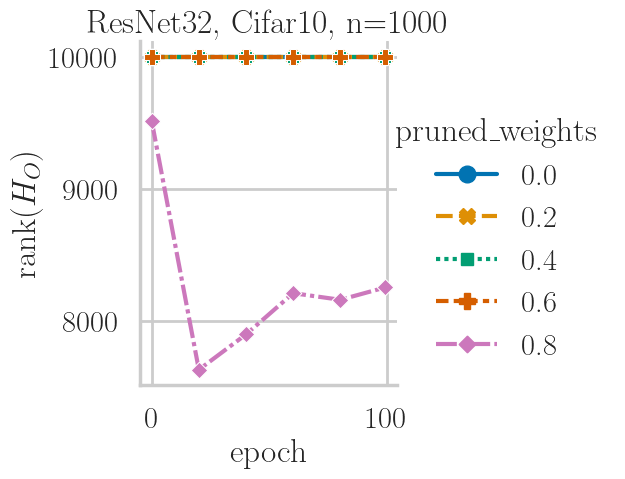

In [15]:
fn = 'outer_prod_hessian_information_ResNet32_pruned_weights.pkl'
hession_info_resnet32 = load_pandas_df(file_path, fn)

            
sns.relplot(hession_info_resnet32, x='epoch', y='H_o_rank', hue='pruned_weights', style='pruned_weights', markers=True, kind='line', palette='colorblind')

plt.ylabel('rank$(H_O)$')

plt.title('ResNet32, Cifar10, n=1000')
plt.savefig('ResNet32_rank_HO.pdf', bbox_inches='tight')

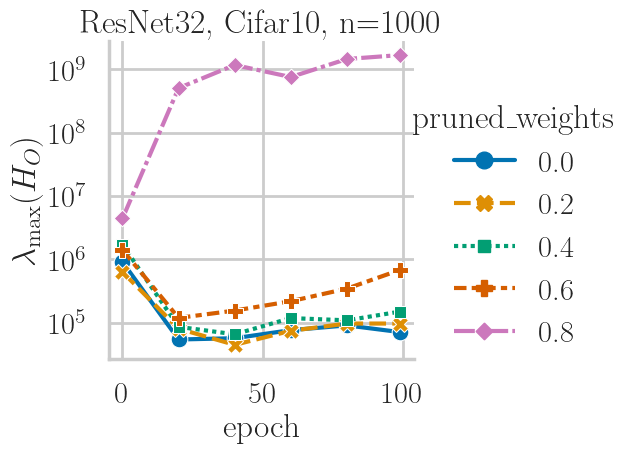

In [16]:
sns.relplot(hession_info_resnet32, x='epoch', y='lambda_max_H_o', hue='pruned_weights', style='pruned_weights', markers=True, kind='line', palette='colorblind')
plt.yscale('log')


plt.ylabel('$\lambda_{\max}(H_O)$')

plt.title('ResNet32, Cifar10, n=1000')
plt.savefig('ResNet32_lam_max_HO.pdf', bbox_inches='tight')

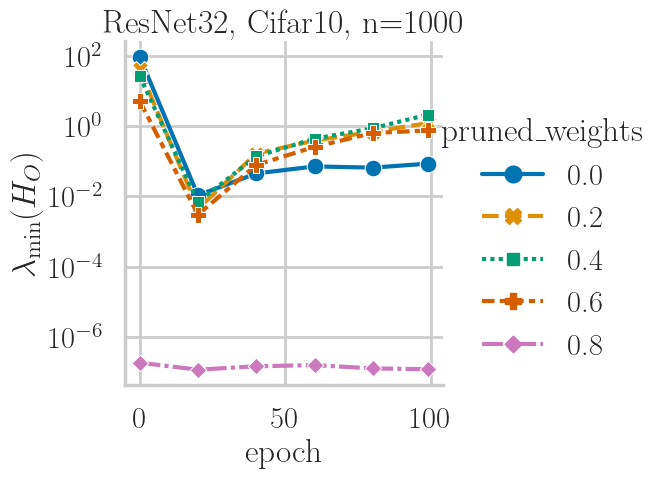

In [17]:
sns.relplot(hession_info_resnet32, x='epoch', y='lambda_min_H_o', hue='pruned_weights', style='pruned_weights', markers=True, kind='line', palette='colorblind')

plt.yscale('log')

plt.ylabel('$\lambda_{\min}(H_O)$')

plt.title('ResNet32, Cifar10, n=1000')
plt.savefig('ResNet32_lam_min_HO.pdf', bbox_inches='tight')

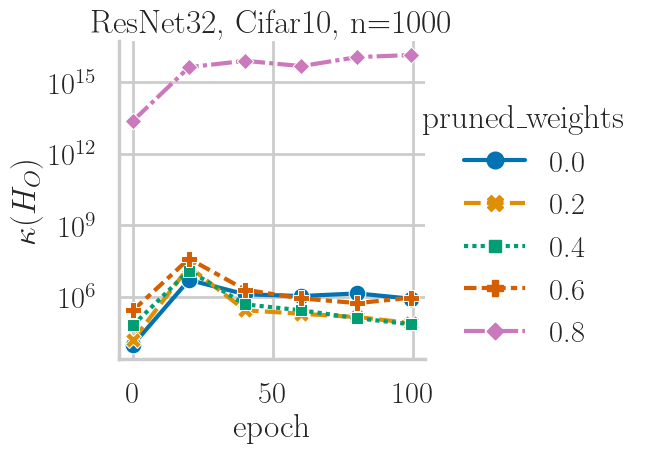

In [18]:
sns.relplot(hession_info_resnet32, x='epoch', y='H_o_cond', hue='pruned_weights', style='pruned_weights', markers=True, kind='line', palette='colorblind')

plt.yscale('log')

plt.ylabel('$\kappa(H_O)$')

plt.title('ResNet32, Cifar10, n=1000')
plt.savefig('ResNet32_cond_HO.pdf', bbox_inches='tight')

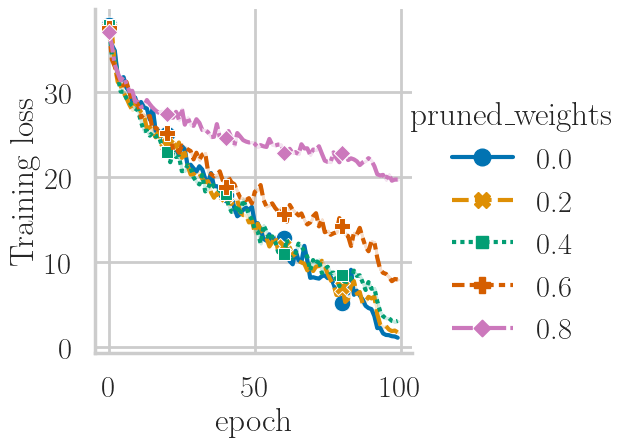

In [31]:
fn = 'training_information_ResNet20_pruned_weights.pkl'
training_infos = load_pandas_df(file_path, fn)
training_infos.replace({'pruned_weights': 'pruned weights'}, inplace=True)
            
sns.relplot(training_infos, x='epoch', y='loss', hue='pruned_weights', style='pruned_weights', markers=True, markevery=20, kind='line', palette='colorblind')

# plt.title('ResNet20, Cifar10, n=1000')
plt.ylabel('Training loss')

plt.savefig('training_loss_ResNet20_pruned_weights_2.pdf', bbox_inches='tight')

In [62]:
fn = 'outer_prod_hessian_information_ResNet20_pruned_weights.pkl'
hession_info_resnet20 = load_pandas_df(file_path, fn)

hession_info_resnet20.replace({'pruned_weights':{0.0: '0\%', 0.2: '20\%', 0.4: '40\%', 0.6: '60\%', 0.8: '80\%'}}, inplace=True)

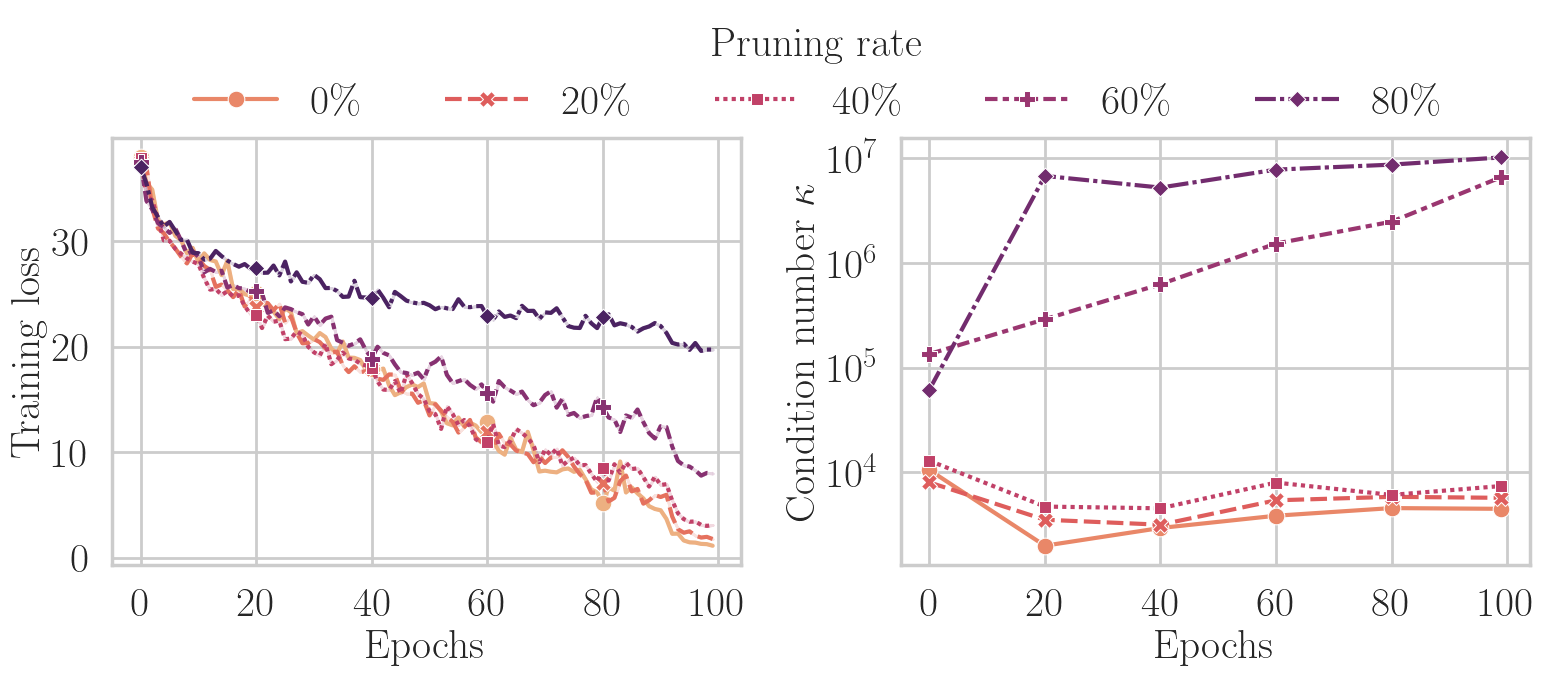

In [64]:
fn = 'training_information_ResNet20_pruned_weights.pkl'
training_infos = load_pandas_df(file_path, fn)
training_infos.replace({'pruned_weights': 'pruned weights'}, inplace=True)

f = plt.figure(figsize=(16,6))

plt.subplot(121)
            
sns.lineplot(training_infos, x='epoch', y='loss', hue='pruned_weights', sizes=(1,1), style='pruned_weights', markers=True, markevery=20, palette='flare', legend=False)

# plt.title('ResNet20, Cifar10, n=1000')
plt.ylabel('Training loss', fontsize=30)
plt.xlabel('Epochs', fontsize=30)
plt.xticks(fontsize=30)
plt.yticks(fontsize=30)
plt.subplot(122)
sns.lineplot(hession_info_resnet20, x='epoch', y='H_o_cond', hue='pruned_weights', sizes=(1,1), style='pruned_weights', markers=True, palette='flare')

plt.yscale('log')

plt.ylabel('Condition number $\kappa$', fontsize=30)
plt.xlabel('Epochs', fontsize=30)
plt.xticks(fontsize=30)
plt.yticks(fontsize=30)
f.tight_layout()

plt.legend(title='Pruning rate', loc=(-1.15,1), ncol = 5, frameon=False, fontsize=30, title_fontsize=30)

# plt.title('ResNet20, Cifar10, n=1000')
plt.savefig('sparse_ResNet20_training_cond_num_2.pdf', bbox_inches='tight')

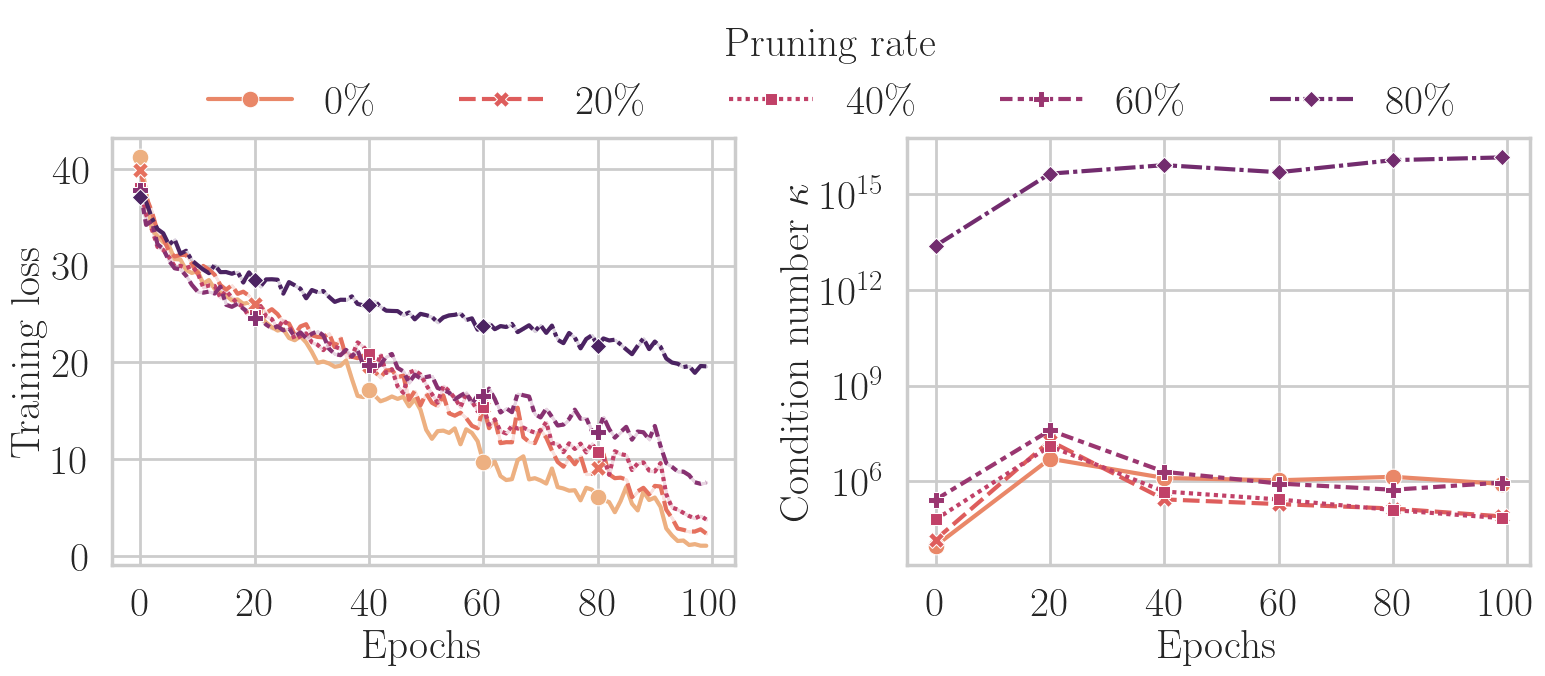

In [184]:
fn = 'training_information_ResNet32_pruned_weights.pkl'
training_infos = load_pandas_df(file_path, fn)
training_infos.replace({'pruned_weights': 'pruned weights'}, inplace=True)
hession_info_resnet32.replace({'pruned_weights':{0.0: '0\%', 0.2: '20\%', 0.4: '40\%', 0.6: '60\%', 0.8: '80\%'}}, inplace=True)

f = plt.figure(figsize=(16,6))

plt.subplot(121)
            
sns.lineplot(training_infos, x='epoch', y='loss', hue='pruned_weights', sizes=(1,1), style='pruned_weights', markers=True, markevery=20, palette='flare', legend=False)

# plt.title('ResNet20, Cifar10, n=1000')
plt.ylabel('Training loss', fontsize=30)
plt.xlabel('Epochs', fontsize=30)
plt.xticks(fontsize=30)
plt.yticks(fontsize=30)
plt.subplot(122)
sns.lineplot(hession_info_resnet32, x='epoch', y='H_o_cond', hue='pruned_weights', sizes=(1,1), style='pruned_weights', markers=True, palette='flare')

plt.yscale('log')

plt.ylabel('Condition number $\kappa$', fontsize=30)
plt.xlabel('Epochs', fontsize=30)
plt.xticks(fontsize=30)
plt.yticks(fontsize=30)
f.tight_layout()

plt.legend(title='Pruning rate', loc=(-1.15,1), ncol = 5, frameon=False, fontsize=30, title_fontsize=30)

# plt.title('ResNet20, Cifar10, n=1000')
plt.savefig('sparse_ResNet32_training_cond_num_2.pdf', bbox_inches='tight')

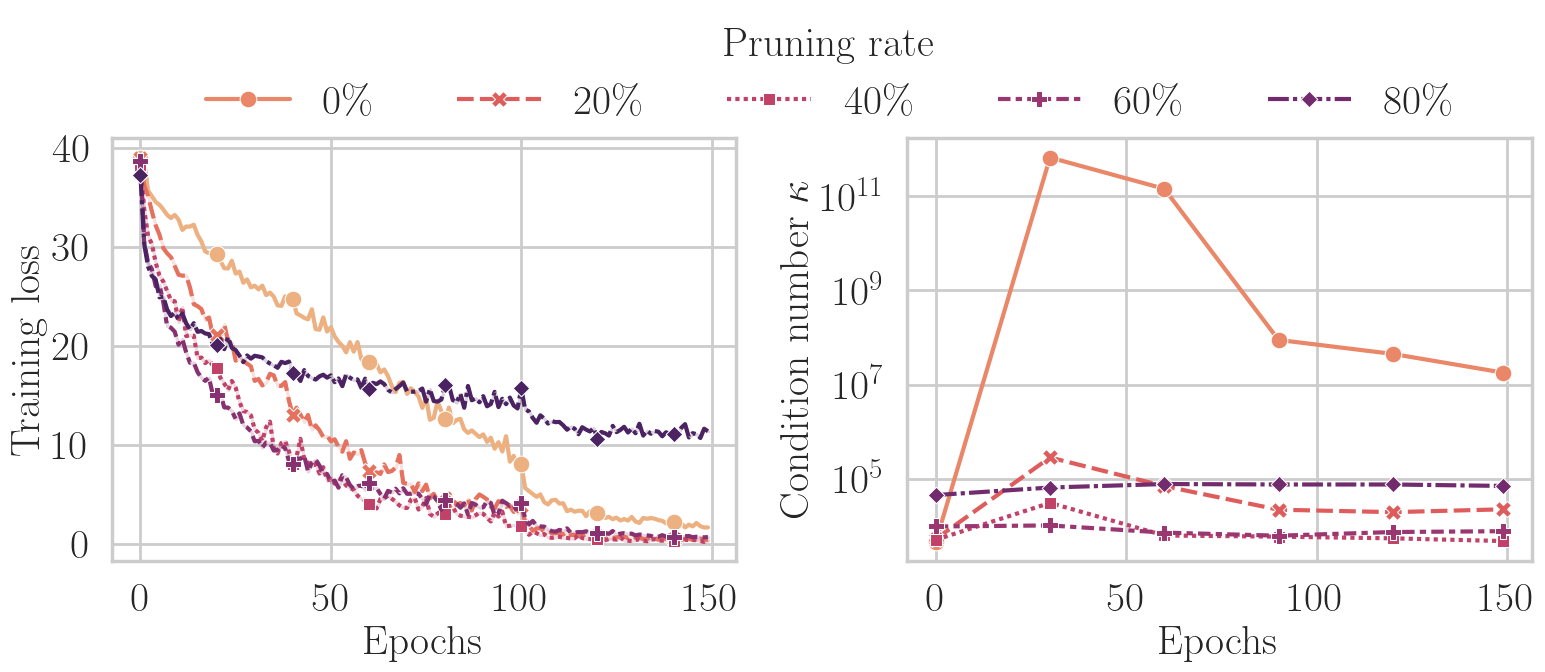

In [67]:
fn = 'training_information_VGG5_pruned_weights.pkl'
training_infos = load_pandas_df(file_path, fn)
training_infos.replace({'pruned_weights': 'pruned weights'}, inplace=True)
hession_info_VGG5.replace({'pruned_weights':{0.0: '0\%', 0.2: '20\%', 0.4: '40\%', 0.6: '60\%', 0.8: '80\%'}}, inplace=True)

f = plt.figure(figsize=(16,6))

plt.subplot(121)
            
sns.lineplot(training_infos, x='epoch', y='loss', hue='pruned_weights', sizes=(1,1), style='pruned_weights', markers=True, markevery=20, palette='flare', legend=False)

# plt.title('ResNet20, Cifar10, n=1000')
plt.ylabel('Training loss', fontsize=30)
plt.xlabel('Epochs', fontsize=30)
plt.xticks(fontsize=30)
plt.yticks(fontsize=30)
plt.subplot(122)
sns.lineplot(hession_info_VGG5, x='epoch', y='H_o_cond', hue='pruned_weights', sizes=(1,1), style='pruned_weights', markers=True, palette='flare')

plt.yscale('log')

plt.ylabel('Condition number $\kappa$', fontsize=30)
plt.xlabel('Epochs', fontsize=30)
plt.xticks(fontsize=30)
plt.yticks(fontsize=30)
f.tight_layout()

plt.legend(title='Pruning rate', loc=(-1.15,1), ncol = 5, frameon=False, fontsize=30, title_fontsize=30)

# plt.title('ResNet20, Cifar10, n=1000')
plt.savefig('sparse_VGG5_training_cond_num_2.pdf', bbox_inches='tight')

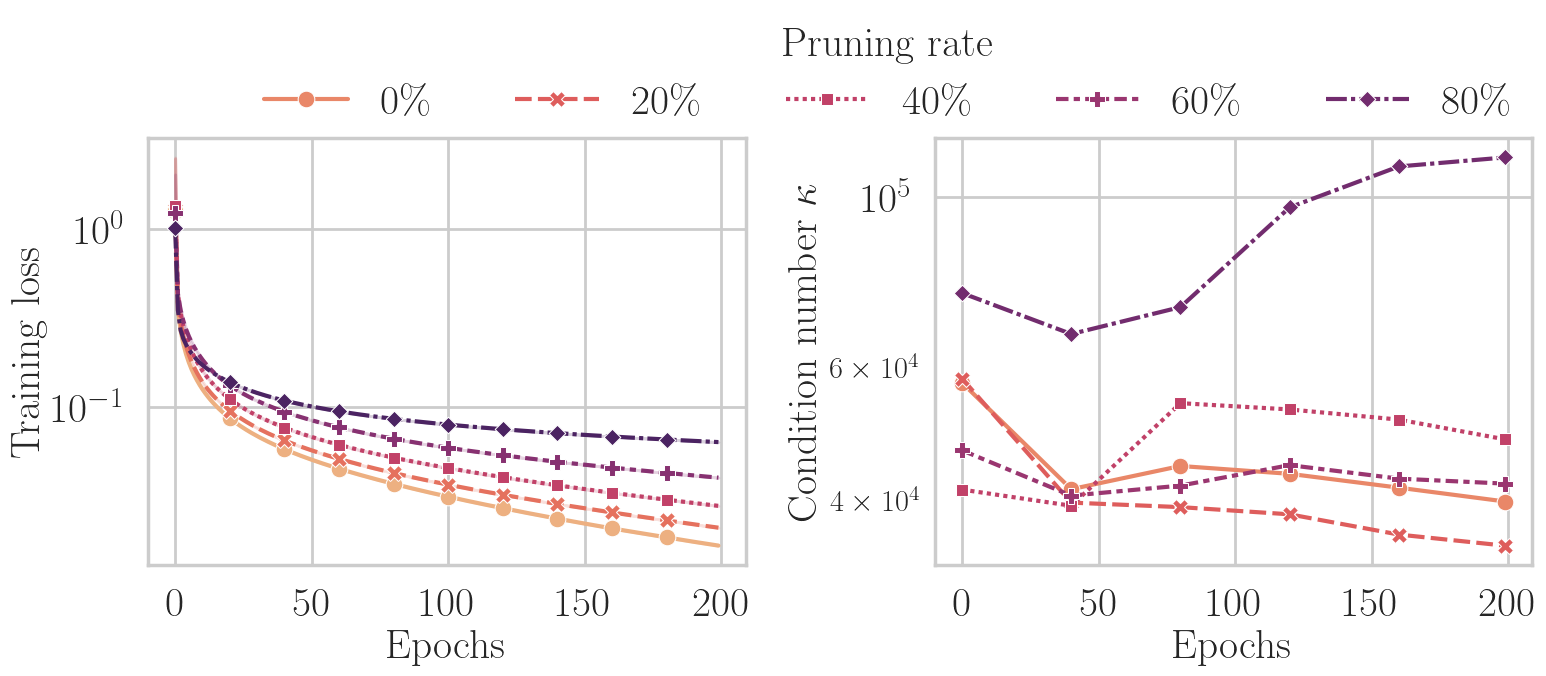

In [70]:
fn = 'training_information_training_n=1000_cifar-10_NOTwhitened_init=0_d=3072_m=[128]_L=[3]_relu_SGD_lr=0.01_BS=64.pkl'
training_infos = load_pandas_df(file_path, fn)
training_infos.replace({'pruned_weights': 'pruned weights'}, inplace=True)

fn = 'outer_prod_hessian_information_FcNN_pruned_weights_Kaiming_init.pkl'
hession_info_FcNN = load_pandas_df(file_path, fn)

hession_info_FcNN.replace({'pruned_weights':{0.0: '0\%', 0.2: '20\%', 0.4: '40\%', 0.6: '60\%', 0.8: '80\%'}}, inplace=True)

f = plt.figure(figsize=(16,6))

plt.subplot(121)
            
sns.lineplot(training_infos, x='epoch', y='loss', hue='pruned_weights', sizes=(1,1), style='pruned_weights', markers=True, markevery=20, palette='flare', legend=False)

# plt.title('ResNet20, Cifar10, n=1000')
plt.ylabel('Training loss', fontsize=30)
plt.xlabel('Epochs', fontsize=30)
plt.xticks(fontsize=30)
plt.yticks(fontsize=30)
plt.yscale('log')
plt.subplot(122)
sns.lineplot(hession_info_FcNN, x='epoch', y='H_o_cond', hue='pruned_weights', sizes=(1,1), style='pruned_weights', markers=True, palette='flare')

plt.yscale('log')

plt.ylabel('Condition number $\kappa$', fontsize=30)
plt.xlabel('Epochs', fontsize=30)
plt.xticks(fontsize=30)
plt.yticks(fontsize=30)
f.tight_layout()

plt.legend(title='Pruning rate', loc=(-1.15,1), ncol = 5, frameon=False, fontsize=30, title_fontsize=30)

# plt.title('ResNet20, Cifar10, n=1000')
plt.savefig('sparse_FcNN_training_cond_num_2.pdf', bbox_inches='tight')

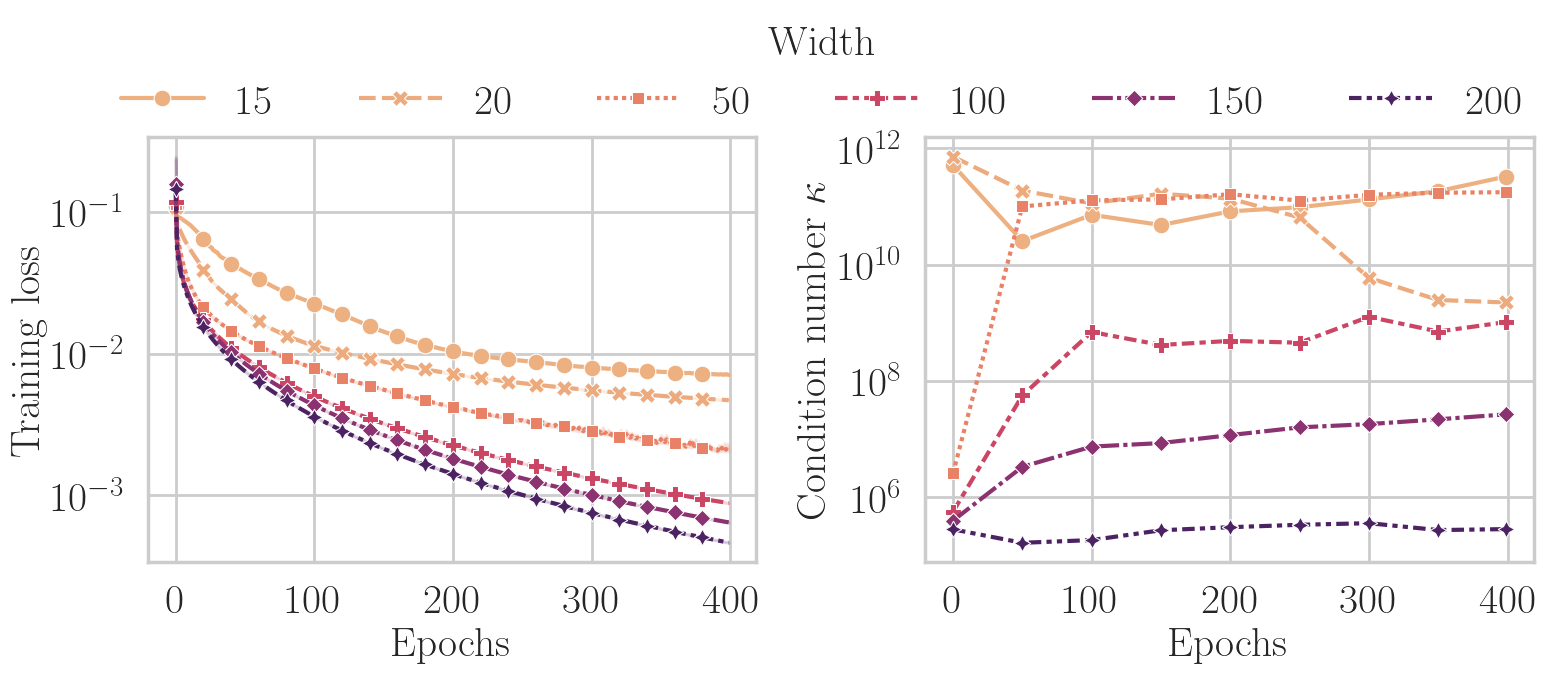

In [70]:
fn = 'training_1hiddenReLU_MNIST_n=1000_increasing_widths.pkl'
training_infos = load_pandas_df(file_path, fn)
training_infos.replace({'pruned_weights': 'pruned weights'}, inplace=True)

fn = 'hessian_information_1hiddenReLU_MNIST_n=1000_kaiming_init.pkl'
hession_info_onehiddenReLU = load_pandas_df(file_path, fn)

# hession_info_onehiddenReLU.replace({'pruned_weights':{0.0: '0\%', 0.2: '20\%', 0.4: '40\%', 0.6: '60\%', 0.8: '80\%'}}, inplace=True)


f = plt.figure(figsize=(16,6))

plt.subplot(121)
            
sns.lineplot(training_infos, x='epoch', y='loss', hue='width', sizes=(1,1), style='width', markers=True, markevery=20, palette='flare', legend=False)

# plt.title('ResNet20, Cifar10, n=1000')
plt.ylabel('Training loss', fontsize=30)
plt.xlabel('Epochs', fontsize=30)
plt.xticks(fontsize=30)
plt.yticks(fontsize=30)

plt.yscale('log')
plt.subplot(122)
sns.lineplot(hession_info_onehiddenReLU, x='epoch', y='H_o_cond', hue='width', sizes=(1,1), style='width', markers=True, palette='flare')

plt.yscale('log')

plt.ylabel('Condition number $\kappa$', fontsize=30)
plt.xlabel('Epochs', fontsize=30)
plt.xticks(fontsize=30)
plt.yticks(fontsize=30)
f.tight_layout()

plt.legend(title='Width', loc=(-1.35,1), ncol = 6, frameon=False, fontsize=30, title_fontsize=30)

# plt.title('ResNet20, Cifar10, n=1000')
plt.savefig('onehiddenReLU_training_cond_num_width_2.pdf', bbox_inches='tight')

In [185]:
training_infos

modelname  epoch   loss_mb    acc_mb       loss    acc  full_grad_norm  \
0     ResNet32      0  2.522794  0.078125  41.187256  0.088        6.879318   
1     ResNet32      0  2.375124  0.171875  41.187256  0.088        6.436945   
2     ResNet32      0  2.604136  0.078125  41.187256  0.088        6.472061   
3     ResNet32      0  2.532304  0.156250  41.187256  0.088        6.053850   
4     ResNet32      0  2.908307  0.093750  41.187256  0.088        5.723793   
...        ...    ...       ...       ...        ...    ...             ...   
1595  ResNet32     99  1.206048  0.515625  19.586666  0.547        0.944916   
1596  ResNet32     99  1.091857  0.546875  19.586666  0.547        0.763724   
1597  ResNet32     99  1.160569  0.562500  19.586666  0.547        0.992754   
1598  ResNet32     99  1.280861  0.562500  19.586666  0.547        0.867845   
1599  ResNet32     99  1.306438  0.525000  19.586666  0.547        1.256583   

      pruned_weights  
0                0.0  
1                0.0  
2                0.0  
3                0.0  
4                0.0  
...              ...  
1595             0.8  
1596             0.8  
1597             0.8  
1598             0.8  
1599             0.8  

[8000 rows x 8 columns]

In [189]:
file_name = 'hessian_info_ViT_pruned_weights.pkl'
df_hessian_info_ViT = load_pandas_df(file_path,file_name)
df_hessian_info_ViT_fil = df_hessian_info_ViT[df_hessian_info_ViT['pruned_weights'] != 0.5] 
df_hessian_info_ViT_fil = df_hessian_info_ViT_fil[df_hessian_info_ViT_fil['pruned_weights'] != 0.7] 


import os
import json

pruned_weights = [0.0,0.2,0.4,0.6,0.8,0.9]
inits = 3

df_training_infos_ViT = pd.DataFrame({'model':[], 'epoch':[], 'loss':[], 'acc':[], 'pruned_weights':[]})


for p_w in pruned_weights:
    for init in range(inits):
        outdir = f'final_pandas_dataframes/ViT/p_w={p_w}'
        jsonfile = os.path.join(outdir, f'metrics_init={init}.json')
        with open(jsonfile, 'r') as f:
            data = json.load(f)
        train_losses = data['train_losses']
        train_accuracies = data['train_accuracies']
        test_losses = data['test_losses']
        accuracies = data['accuracies']
        
        for epoch,loss in enumerate(train_losses):
            df_training_infos_ViT.loc[len(df_training_infos_ViT)] = ['ViT', epoch, loss, train_accuracies[epoch], p_w]
#         print(len(train_losses))
df_training_infos_ViT


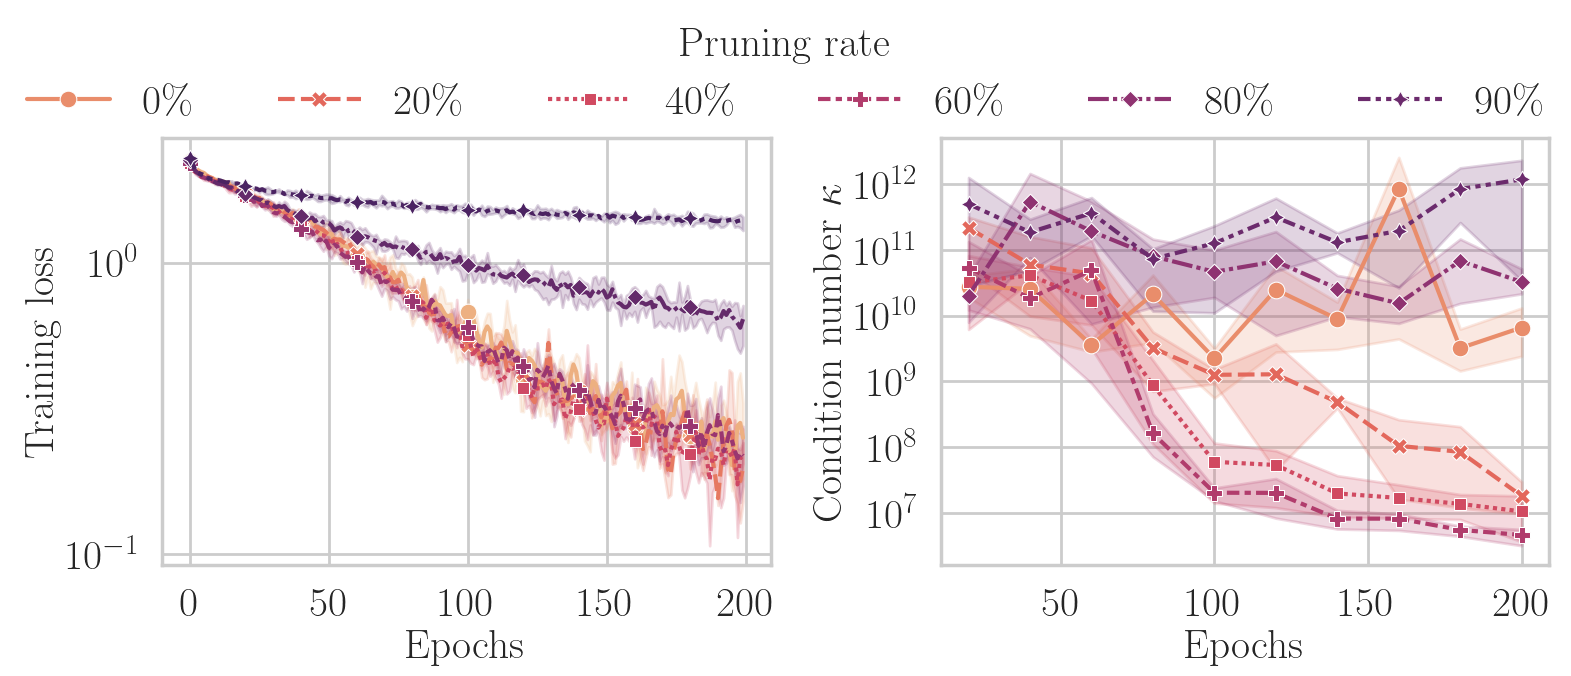

In [195]:
df_hessian_info_ViT_fil.replace({'pruned_weights':{0.0: '0\%', 0.2: '20\%', 0.4: '40\%', 0.6: '60\%', 0.8: '80\%', 0.9: '90\%'}}, inplace=True)

f = plt.figure(figsize=(16,6))

plt.subplot(121)
            
sns.lineplot(df_training_infos_ViT, x='epoch', y='loss', hue='pruned_weights', sizes=(1,1), style='pruned_weights', markers=True, markevery=20, palette='flare', legend=False)

# plt.title('ResNet20, Cifar10, n=1000')
plt.ylabel('Training loss', fontsize=30)
plt.xlabel('Epochs', fontsize=30)
plt.xticks(fontsize=30)
plt.yticks(fontsize=30)
plt.yscale('log')
plt.subplot(122)
sns.lineplot(df_hessian_info_ViT_fil, x='epoch', y='H_o_cond', hue='pruned_weights', sizes=(1,1), style='pruned_weights', markers=True, palette='flare')

plt.yscale('log')

plt.ylabel('Condition number $\kappa$', fontsize=30)
plt.xlabel('Epochs', fontsize=30)
plt.xticks(fontsize=30)
plt.yticks(fontsize=30)
f.tight_layout()

plt.legend(title='Pruning rate', loc=(-1.53,1), ncol = 6, frameon=False, fontsize=30, title_fontsize=30)

# plt.title('ResNet20, Cifar10, n=1000')
plt.savefig('sparse_ViT_training_cond_num_2.pdf', bbox_inches='tight')

In [71]:
hession_info_onehiddenReLU

dataset  num_samples        network  init   lr  width  epoch      H_o_cond  \
0    MNIST         1000  1-hidden ReLU     0  0.3     15      0  5.163095e+11   
1    MNIST         1000  1-hidden ReLU     0  0.3     15     50  2.544432e+10   
2    MNIST         1000  1-hidden ReLU     0  0.3     15    100  7.215529e+10   
3    MNIST         1000  1-hidden ReLU     0  0.3     15    150  4.814803e+10   
4    MNIST         1000  1-hidden ReLU     0  0.3     15    200  8.267948e+10   
5    MNIST         1000  1-hidden ReLU     0  0.3     15    250  9.744276e+10   
6    MNIST         1000  1-hidden ReLU     0  0.3     15    300  1.323711e+11   
7    MNIST         1000  1-hidden ReLU     0  0.3     15    350  1.839681e+11   
8    MNIST         1000  1-hidden ReLU     0  0.3     15    399  3.286460e+11   
9    MNIST         1000  1-hidden ReLU     0  0.3     20      0  7.220772e+11   
10   MNIST         1000  1-hidden ReLU     0  0.3     20     50  1.888331e+11   
11   MNIST         1000  1-hidden ReLU     0  0.3     20    100  1.134495e+11   
12   MNIST         1000  1-hidden ReLU     0  0.3     20    150  1.662666e+11   
13   MNIST         1000  1-hidden ReLU     0  0.3     20    200  1.368612e+11   
14   MNIST         1000  1-hidden ReLU     0  0.3     20    250  6.497957e+10   
15   MNIST         1000  1-hidden ReLU     0  0.3     20    300  5.940525e+09   
16   MNIST         1000  1-hidden ReLU     0  0.3     20    350  2.467590e+09   
17   MNIST         1000  1-hidden ReLU     0  0.3     20    399  2.234220e+09   
18   MNIST         1000  1-hidden ReLU     0  0.5     50      0  2.558210e+06   
19   MNIST         1000  1-hidden ReLU     0  0.5     50     50  1.005263e+11   
20   MNIST         1000  1-hidden ReLU     0  0.5     50    100  1.279347e+11   
21   MNIST         1000  1-hidden ReLU     0  0.5     50    150  1.329773e+11   
22   MNIST         1000  1-hidden ReLU     0  0.5     50    200  1.629548e+11   
23   MNIST         1000  1-hidden ReLU     0  0.5     50    250  1.266570e+11   
24   MNIST         1000  1-hidden ReLU     0  0.5     50    300  1.596952e+11   
25   MNIST         1000  1-hidden ReLU     0  0.5     50    350  1.728194e+11   
26   MNIST         1000  1-hidden ReLU     0  0.5     50    399  1.765496e+11   
27   MNIST         1000  1-hidden ReLU     0  0.5    100      0  5.586899e+05   
28   MNIST         1000  1-hidden ReLU     0  0.5    100     50  5.614399e+07   
29   MNIST         1000  1-hidden ReLU     0  0.5    100    100  6.936272e+08   
30   MNIST         1000  1-hidden ReLU     0  0.5    100    150  4.147202e+08   
31   MNIST         1000  1-hidden ReLU     0  0.5    100    200  4.883201e+08   
32   MNIST         1000  1-hidden ReLU     0  0.5    100    250  4.540633e+08   
33   MNIST         1000  1-hidden ReLU     0  0.5    100    300  1.266928e+09   
34   MNIST         1000  1-hidden ReLU     0  0.5    100    350  7.064929e+08   
35   MNIST         1000  1-hidden ReLU     0  0.5    100    399  1.029409e+09   
36   MNIST         1000  1-hidden ReLU     0  0.5    150      0  3.936737e+05   
37   MNIST         1000  1-hidden ReLU     0  0.5    150     50  3.323517e+06   
38   MNIST         1000  1-hidden ReLU     0  0.5    150    100  7.404242e+06   
39   MNIST         1000  1-hidden ReLU     0  0.5    150    150  8.510600e+06   
40   MNIST         1000  1-hidden ReLU     0  0.5    150    200  1.167098e+07   
41   MNIST         1000  1-hidden ReLU     0  0.5    150    250  1.586209e+07   
42   MNIST         1000  1-hidden ReLU     0  0.5    150    300  1.805021e+07   
43   MNIST         1000  1-hidden ReLU     0  0.5    150    350  2.181786e+07   
44   MNIST         1000  1-hidden ReLU     0  0.5    150    399  2.657951e+07   
45   MNIST         1000  1-hidden ReLU     0  0.5    200      0  2.790675e+05   
46   MNIST         1000  1-hidden ReLU     0  0.5    200     50  1.637018e+05   
47   MNIST         1000  1-hidden ReLU     0  0.5    200    100  1.824709e+05   
48   MNIST         1000  1-hidden 

In [94]:
hession_info_onehiddenReLU_fil = hession_info_onehiddenReLU[hession_info_onehiddenReLU['width'] == 20]

In [95]:
hession_info_onehiddenReLU_fil

dataset  num_samples        network  init   lr  width  epoch      H_o_cond  \
9    MNIST         1000  1-hidden ReLU     0  0.3     20      0  7.220772e+11   
10   MNIST         1000  1-hidden ReLU     0  0.3     20     50  1.888331e+11   
11   MNIST         1000  1-hidden ReLU     0  0.3     20    100  1.134495e+11   
12   MNIST         1000  1-hidden ReLU     0  0.3     20    150  1.662666e+11   
13   MNIST         1000  1-hidden ReLU     0  0.3     20    200  1.368612e+11   
14   MNIST         1000  1-hidden ReLU     0  0.3     20    250  6.497957e+10   
15   MNIST         1000  1-hidden ReLU     0  0.3     20    300  5.940525e+09   
16   MNIST         1000  1-hidden ReLU     0  0.3     20    350  2.467590e+09   
17   MNIST         1000  1-hidden ReLU     0  0.3     20    399  2.234220e+09   

                                         H_o_spectrum  H_o_rank  \
9   [tensor(-3.2250e-11, dtype=torch.float64), ten...      7957   
10  [tensor(-3.7365e-11, dtype=torch.float64), ten...      3984   
11  [tensor(-2.6223e-11, dtype=torch.float64), ten...      3550   
12  [tensor(-2.8799e-11, dtype=torch.float64), ten...      3252   
13  [tensor(-2.8454e-11, dtype=torch.float64), ten...      3037   
14  [tensor(-4.8042e-11, dtype=torch.float64), ten...      2868   
15  [tensor(-4.4613e-11, dtype=torch.float64), ten...      2753   
16  [tensor(-3.2178e-11, dtype=torch.float64), ten...      2676   
17  [tensor(-3.3189e-11, dtype=torch.float64), ten...      2627   

    lambda_max_H_o  lambda_min_H_o  
9     80048.654137    1.108589e-07  
10    21438.368861    1.135308e-07  
11    20430.489928    1.800845e-07  
12    19898.621518    1.196790e-07  
13    20342.689475    1.486374e-07  
14    20879.392101    3.213224e-07  
15    21349.319217    3.593844e-06  
16    22546.830046    9.137185e-06  
17    23752.263218    1.063112e-05

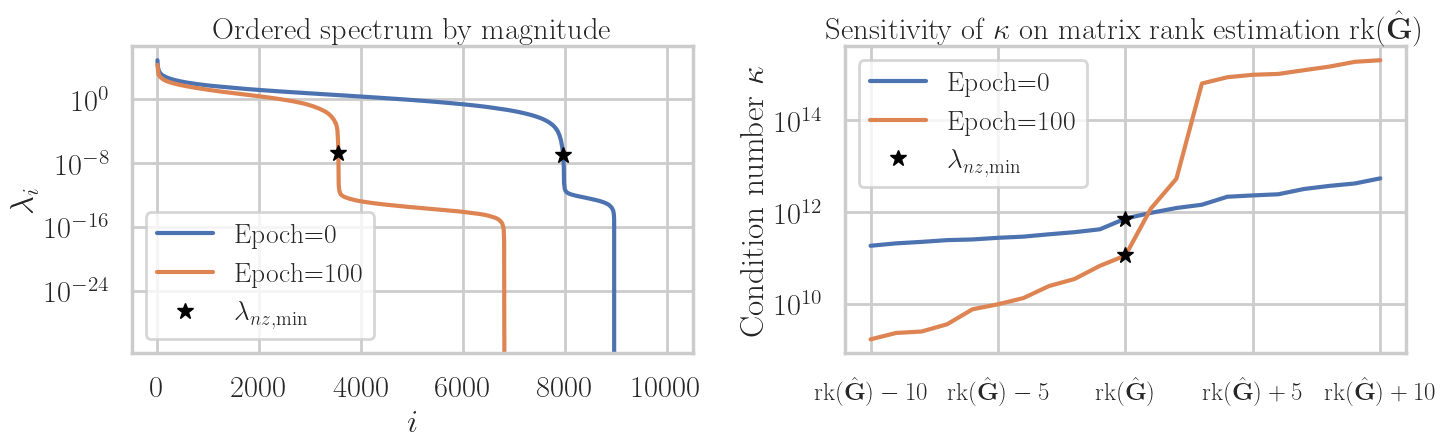

In [164]:
import numpy as np

fig = plt.figure(figsize=(15,5))

plt.subplot(121)

j=0
plt.semilogy(np.flip(hession_info_onehiddenReLU_fil.H_o_spectrum.iloc[j].numpy()),label='Epoch=0')
plt.plot(hession_info_onehiddenReLU_fil.H_o_rank.iloc[j],hession_info_onehiddenReLU_fil.H_o_spectrum.iloc[j][-hession_info_onehiddenReLU_fil.H_o_rank.iloc[j]],'*',c=[0,0,0])

k=2
plt.semilogy(np.flip(hession_info_onehiddenReLU_fil.H_o_spectrum.iloc[k].numpy()),label='Epoch=100')
plt.plot(hession_info_onehiddenReLU_fil.H_o_rank.iloc[k],hession_info_onehiddenReLU_fil.H_o_spectrum.iloc[k][-hession_info_onehiddenReLU_fil.H_o_rank.iloc[k]],'*',c=[0,0,0],label='$\lambda_{nz,\min}$')

plt.ylabel('$\lambda_i$')
plt.xlabel('$i$')
plt.title('Ordered spectrum by magnitude', fontsize=22)
plt.legend(fontsize=20)

Delta = 10
est_rank = hession_info_onehiddenReLU_fil.H_o_rank.iloc[j]

plt.subplot(122)
cond_nums=[]
for i in range(est_rank-Delta,est_rank+Delta+1):
#     print(i)
    cond_nums.append(hession_info_onehiddenReLU_fil.H_o_spectrum.iloc[j].numpy()[-1]/hession_info_onehiddenReLU_fil.H_o_spectrum.iloc[j].numpy()[-i])

plt.semilogy(cond_nums,label='Epoch=0')

plt.plot(10,cond_nums[10],'*', c=[0,0,0])

est_rank = hession_info_onehiddenReLU_fil.H_o_rank.iloc[k]

cond_nums=[]
for i in range(est_rank-Delta,est_rank+Delta+1):
#     print(i)
    cond_nums.append(hession_info_onehiddenReLU_fil.H_o_spectrum.iloc[k].numpy()[-1]/hession_info_onehiddenReLU_fil.H_o_spectrum.iloc[k].numpy()[-i])

plt.semilogy(cond_nums,label='Epoch=100')

plt.plot(10,cond_nums[10],'*', c=[0,0,0], label='$\lambda_{nz,\min}$')

plt.ylabel('Condition number $\kappa$')
plt.title('Sensitivity of $\kappa$ on matrix rank estimation $\\text{rk}(\hat{\mathbf{G}})$', fontsize=22)
# plt.xticks(['$\\text{rk}(\hat{\mathbf{G}}) - 10$','$\\text{rk}(\hat{\mathbf{G}}) - 10$','$\\text{rk}(\hat{\mathbf{G}}) - 10$','$\\text{rk}(\hat{\mathbf{G}}) - 10$','$\\text{rk}(\hat{\mathbf{G}}) - 10$'])
plt.xticks([0,5,10,15,20],['$\\text{rk}(\hat{\mathbf{G}})-10$','$\\text{rk}(\hat{\mathbf{G}})-5$','$\\text{rk}(\hat{\mathbf{G}})$','$\\text{rk}(\hat{\mathbf{G}})+5$','$\\text{rk}(\hat{\mathbf{G}}) + 10$'], fontsize=18)
plt.legend(fontsize=20)

fig.tight_layout()


plt.savefig('sensitiviy_on_smallest_eigenvalue.pdf', bbox_inches='tight')

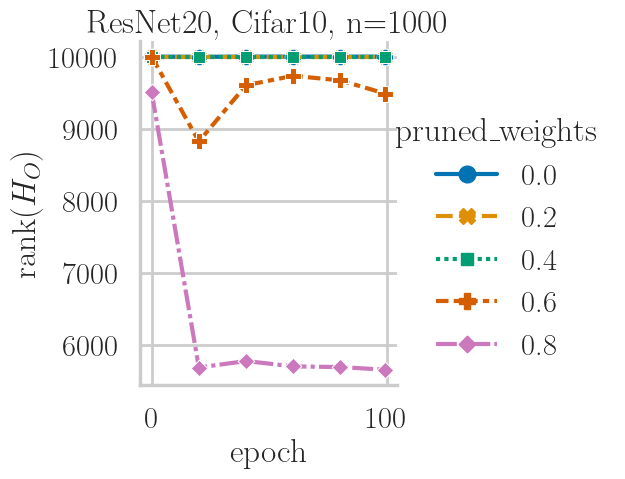

In [29]:

            
sns.relplot(hession_info_resnet20, x='epoch', y='H_o_rank', hue='pruned_weights', style='pruned_weights', markers=True, kind='line', palette='colorblind')

plt.ylabel('rank$(H_O)$')

plt.title('ResNet20, Cifar10, n=1000')
plt.savefig('ResNet20_rank_HO.pdf', bbox_inches='tight')

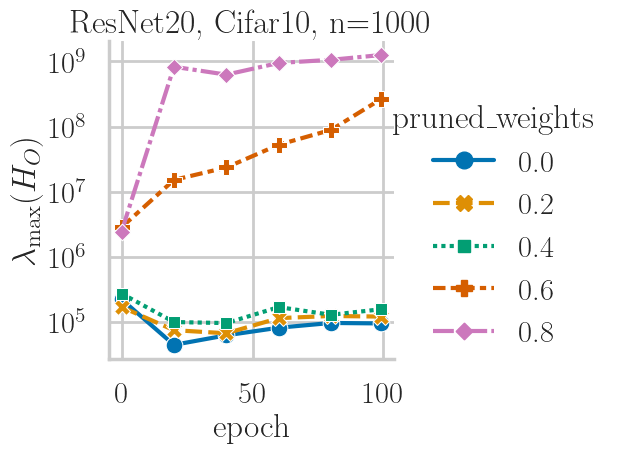

In [30]:
sns.relplot(hession_info_resnet20, x='epoch', y='lambda_max_H_o', hue='pruned_weights', style='pruned_weights', markers=True, kind='line', palette='colorblind')
plt.yscale('log')


plt.ylabel('$\lambda_{\max}(H_O)$')

plt.title('ResNet20, Cifar10, n=1000')
plt.savefig('ResNet20_lam_max_HO.pdf', bbox_inches='tight')

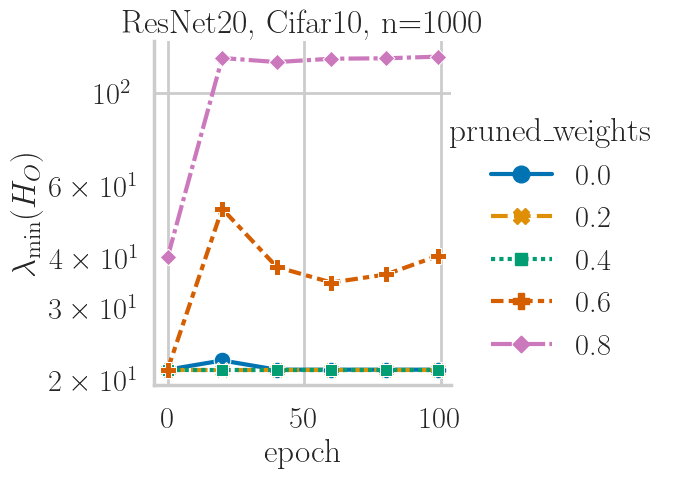

In [31]:
sns.relplot(hession_info_resnet20, x='epoch', y='lambda_min_H_o', hue='pruned_weights', style='pruned_weights', markers=True, kind='line', palette='colorblind')

plt.yscale('log')

plt.ylabel('$\lambda_{\min}(H_O)$')

plt.title('ResNet20, Cifar10, n=1000')
plt.savefig('ResNet20_lam_min_HO.pdf', bbox_inches='tight')

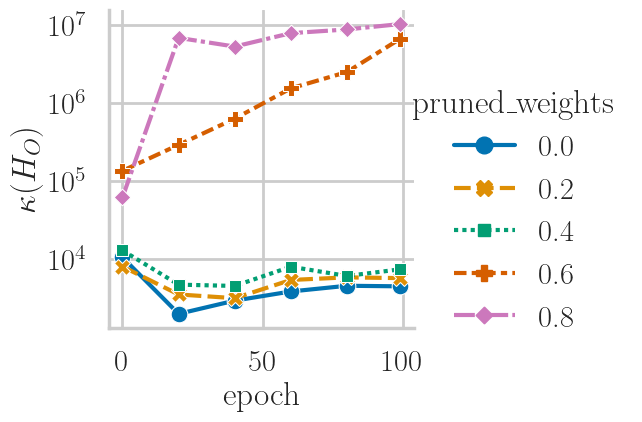

In [32]:
sns.relplot(hession_info_resnet20, x='epoch', y='H_o_cond', hue='pruned_weights', style='pruned_weights', markers=True, kind='line', palette='colorblind')

plt.yscale('log')

plt.ylabel('$\kappa(H_O)$')

# plt.title('ResNet20, Cifar10, n=1000')
plt.savefig('ResNet20_cond_HO_2.pdf', bbox_inches='tight')

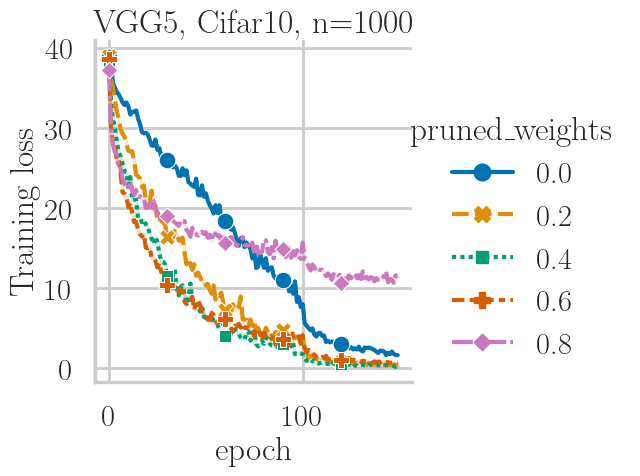

In [26]:
fn = 'training_information_VGG5_pruned_weights.pkl'
training_infos = load_pandas_df(file_path, fn)
training_infos.replace({'pruned_weights': 'pruned weights'}, inplace=True)
            
sns.relplot(training_infos, x='epoch', y='loss', hue='pruned_weights', style='pruned_weights', markers=True, markevery=30, kind='line', palette='colorblind')

plt.title('VGG5, Cifar10, n=1000')
plt.ylabel('Training loss')

plt.savefig('training_loss_VGG5_pruned_weights.pdf', bbox_inches='tight')

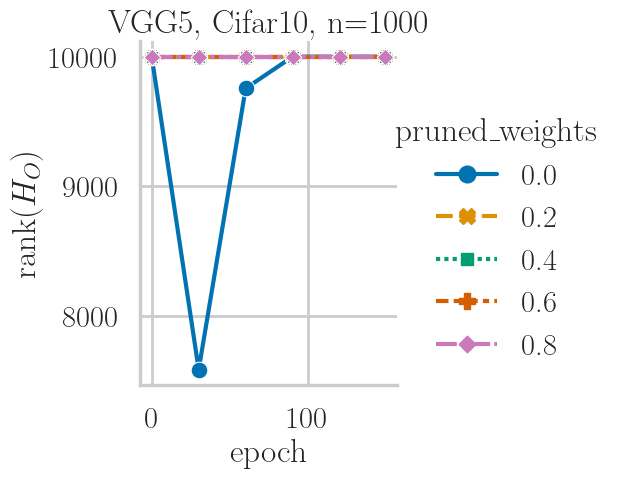

In [25]:
fn = 'outer_prod_hessian_information_VGG5_pruned_weights.pkl'
hession_info_VGG5 = load_pandas_df(file_path, fn)

            
sns.relplot(hession_info_VGG5, x='epoch', y='H_o_rank', hue='pruned_weights', style='pruned_weights', markers=True, kind='line', palette='colorblind')

plt.ylabel('rank$(H_O)$')

plt.title('VGG5, Cifar10, n=1000')
plt.savefig('VGG5_rank_HO.pdf', bbox_inches='tight')

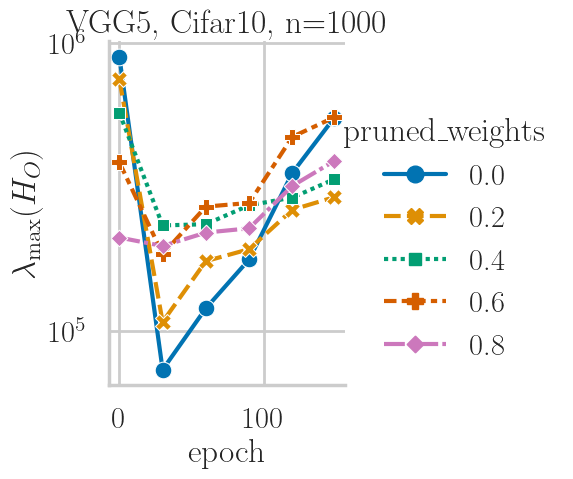

In [27]:
sns.relplot(hession_info_VGG5, x='epoch', y='lambda_max_H_o', hue='pruned_weights', style='pruned_weights', markers=True, kind='line', palette='colorblind')
plt.yscale('log')


plt.ylabel('$\lambda_{\max}(H_O)$')

plt.title('VGG5, Cifar10, n=1000')
plt.savefig('VGG5_lam_max_HO.pdf', bbox_inches='tight')

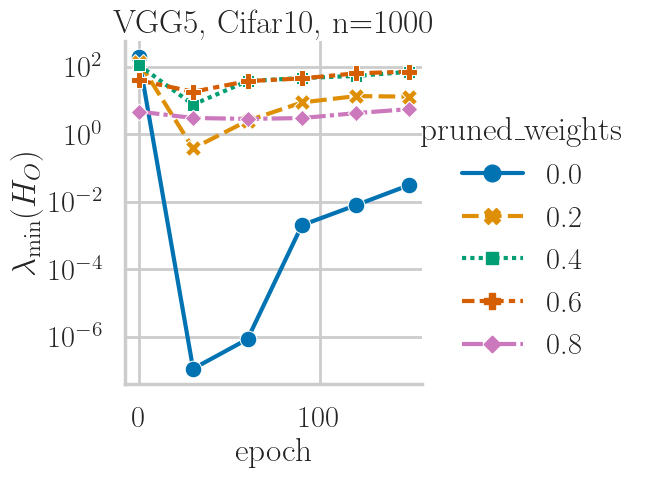

In [28]:
sns.relplot(hession_info_VGG5, x='epoch', y='lambda_min_H_o', hue='pruned_weights', style='pruned_weights', markers=True, kind='line', palette='colorblind')

plt.yscale('log')

plt.ylabel('$\lambda_{\min}(H_O)$')

plt.title('VGG5, Cifar10, n=1000')
plt.savefig('VGG5_lam_min_HO.pdf', bbox_inches='tight')

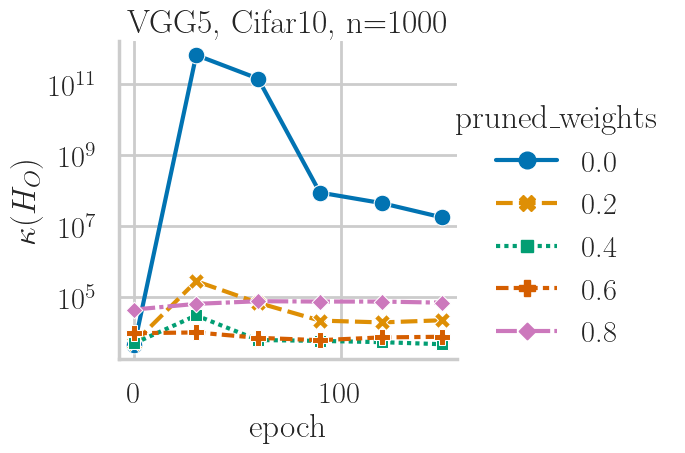

In [29]:
sns.relplot(hession_info_VGG5, x='epoch', y='H_o_cond', hue='pruned_weights', style='pruned_weights', markers=True, kind='line', palette='colorblind')

plt.yscale('log')

plt.ylabel('$\kappa(H_O)$')

plt.title('VGG5, Cifar10, n=1000')
plt.savefig('VGG5_cond_HO.pdf', bbox_inches='tight')

#### Batch-norm figures

In [72]:
file_name = 'hessian_information_initialization_experiments_effect_of_w_BN_NOTwhitened_grayscale_cifar10_d=64_n=1000_linear_Net_num_init=5.pkl'
df_bn = load_pandas_df(file_path, file_name)
df_bn.insert(0,'batchnorm','BN')

In [73]:
file_name = 'hessian_information_initialization_experiments_effect_of_wo_BN_NOTwhitened_grayscale_cifar10_d=64_n=1000_linear_Net_num_init=5.pkl'
df_noBN = load_pandas_df(file_path, file_name)
df_noBN.insert(0,'batchnorm','no BN')

In [74]:
df_conc_BN = pd.concat([df_bn,df_noBN])
df_conc_BN

batchnorm  input_dim  output_dim  width  depth activ_f  epoch  H_cond  \
0         BN       64.0        10.0   70.0    1.0  linear    0.0     NaN   
1         BN       64.0        10.0   70.0    1.0  linear    0.0     NaN   
2         BN       64.0        10.0   70.0    1.0  linear    0.0     NaN   
3         BN       64.0        10.0   70.0    1.0  linear    0.0     NaN   
4         BN       64.0        10.0   70.0    1.0  linear    0.0     NaN   
5         BN       64.0        10.0   80.0    1.0  linear    0.0     NaN   
6         BN       64.0        10.0   80.0    1.0  linear    0.0     NaN   
7         BN       64.0        10.0   80.0    1.0  linear    0.0     NaN   
8         BN       64.0        10.0   80.0    1.0  linear    0.0     NaN   
9         BN       64.0        10.0   80.0    1.0  linear    0.0     NaN   
10        BN       64.0        10.0  100.0    1.0  linear    0.0     NaN   
11        BN       64.0        10.0  100.0    1.0  linear    0.0     NaN   
12        BN       64.0        10.0  100.0    1.0  linear    0.0     NaN   
13        BN       64.0        10.0  100.0    1.0  linear    0.0     NaN   
14        BN       64.0        10.0  100.0    1.0  linear    0.0     NaN   
15        BN       64.0        10.0  120.0    1.0  linear    0.0     NaN   
16        BN       64.0        10.0  120.0    1.0  linear    0.0     NaN   
17        BN       64.0        10.0  120.0    1.0  linear    0.0     NaN   
18        BN       64.0        10.0  120.0    1.0  linear    0.0     NaN   
19        BN       64.0        10.0  120.0    1.0  linear    0.0     NaN   
20        BN       64.0        10.0  150.0    1.0  linear    0.0     NaN   
21        BN       64.0        10.0  150.0    1.0  linear    0.0     NaN   
22        BN       64.0        10.0  150.0    1.0  linear    0.0     NaN   
23        BN       64.0        10.0  150.0    1.0  linear    0.0     NaN   
24        BN       64.0        10.0  150.0    1.0  linear    0.0     NaN   
0      no BN       64.0        10.0   70.0    1.0  linear    0.0     NaN   
1      no BN       64.0        10.0   70.0    1.0  linear    0.0     NaN   
2      no BN       64.0        10.0   70.0    1.0  linear    0.0     NaN   
3      no BN       64.0        10.0   70.0    1.0  linear    0.0     NaN   
4      no BN       64.0        10.0   70.0    1.0  linear    0.0     NaN   
5      no BN       64.0        10.0   80.0    1.0  linear    0.0     NaN   
6      no BN       64.0        10.0   80.0    1.0  linear    0.0     NaN   
7      no BN       64.0        10.0   80.0    1.0  linear    0.0     NaN   
8      no BN       64.0        10.0   80.0    1.0  linear    0.0     NaN   
9      no BN       64.0        10.0   80.0    1.0  linear    0.0     NaN   
10     no BN       64.0        10.0  100.0    1.0  linear    0.0     NaN   
11     no BN       64.0        10.0  100.0    1.0  linear    0.0     NaN   
12     no BN       64.0        10.0  100.0    1.0  linear    0.0     NaN   
13     no BN       64.0        10.0  100.0    1.0  linear    0.0     NaN   
14     no BN       64.0        10.0  100.0    1.0  linear    0.0     NaN   
15     no BN       64.0        10.0  120.0    1.0  linear    0.0     NaN   
16     no BN       64.0        10.0  120.0    1.0  linear    0.0     NaN   
17     no BN       64.0        10.0  120.0    1.0  linear    0.0     NaN   
18     no BN       64.0        10.0  120.0    1.0  linear    0.0     NaN   
19     no BN       64.0        10.0  120.0    1.0  linear    0.0     NaN   
20     no BN       64.0        10.0  150.0    1.0  linear    0.0     NaN   
21     no BN       64.0        10.0  150.0    1.0  linear    0.0     NaN   
22     no BN       64.0        10.0  150.0    1.0  linear    0.0     NaN   
23     no BN       64.0        10.0  150.0    1.0  linear    0.0     NaN   
24     no BN       64.0        10.0  150.0    1.0  linear    0.0     NaN   

       H_o_cond  lam_abs_min_H  lam_abs_max_H  \
0    552.270808            NaN            NaN   
1    626.136118            N

/var/folders/yz/pp0mnv4s6qb6j8z0xkgwpdmr0000gq/T/ipykernel_35195/897094122.py:39: UserWarning: The markers list has more values (5) than needed (2), which may not be intended.
  g = sns.lineplot(df, x='width',y='H_o_cond', alpha=0.7, hue='batchnorm', style='batchnorm', markers=markers)


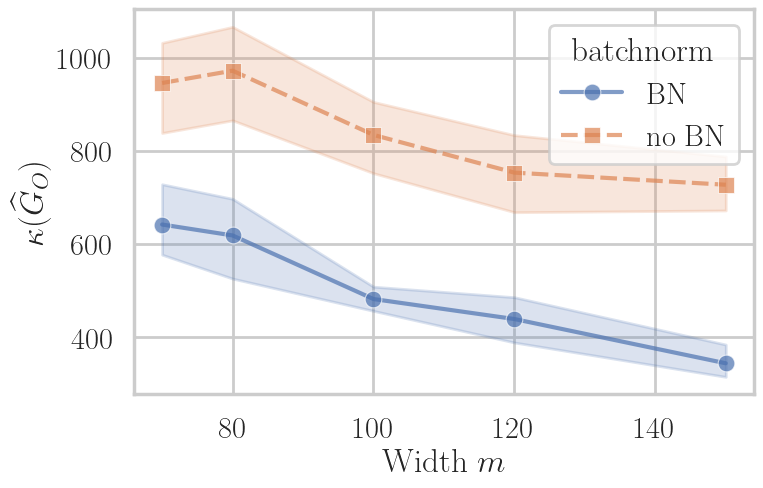

In [76]:
filename='BN_comparison_grayscale_cifar10_d=64_n=1000'
title=''

make_lineplot_BN_comparison(df_conc_BN,title,filename=filename,save=True)

### Linear networks
1. show whitened data improves conditioning: Cifar-10
2. show convex combination bound is better: MNIST, Cifar-10

3. Fixed width with depth: MNIST, Cifar-10
4. Width proportional with depth: smaller constant: MNIST
5. Width proportional with depth: larger constant: MNIST

##### 1. show whitened data improves conditioning: Cifar-10

In [81]:
def whitenend_vs_not_whitened_relplot(df,sigma,filename=None,save=False):
    g = sns.relplot(df, x='depth',y='value', alpha=0.7, col='width', kind='line', hue='normalization', style='normalization', style_order=['whitened','not whitened'], markers=markers)
    g.set(yscale='log')

    g.set_axis_labels('Depth $L$','$\kappa(\widehat{G}_O)$')

    g.set_titles('Width: {col_name}')

    g.fig.suptitle('whitened: $\kappa(\Sigma)=1.0$, not whitened: $\kappa(\Sigma) = %.2e$' % sigma)
    g.fig.subplots_adjust(top=0.8)
    
    sns.move_legend(g, "lower center", bbox_to_anchor=(0.45, -0.1), ncol=3, title=None, frameon=True)



    if save==True:
        g.savefig(filepath+ filename + '.pdf')


In [82]:
filename='outer_prod_hessian_information_initialization_experiments_effect_of_width_and_depth_tightness_of_L_layer_condnum_bounds_cifar10_NOTwhitened_LinNet_num_init=3.pkl'
filename2='outer_prod_hessian_information_initialization_experiments_effect_of_width_and_depth_tightness_of_L_layer_condnum_bounds_cifar10_whitened_LinNet_num_init=3.pkl'

df_NOTwhitened = load_pandas_df(file_path, filename)
df_NOTwhitened= filter_bound_2_3_out(df_NOTwhitened)
df_NOTwhitened = filter_bound_1_out(df_NOTwhitened)

df_whitened = load_pandas_df(file_path, filename2)
df_whitened= filter_bound_2_3_out(df_whitened)
df_whitened = filter_bound_1_out(df_whitened)

df_conc_w = pd.concat([df_whitened , df_NOTwhitened])
df_conc_w['depth'] += 1


In [83]:
sigma = df_conc_w.iloc[-1]['cond_cov_xx']

df_conc_w = df_conc_w.replace({df_conc_w.iloc[0]['cond_cov_xx']: 'whitened', df_conc_w.iloc[-1]['cond_cov_xx']: 'not whitened'})
df_conc_w = df_conc_w.rename(columns={'cond_cov_xx':'normalization'})
df_conc_w

dataset network normalization  input_dim  output_dim  width  depth  \
0    cifar-10    FCNN      whitened       3072          10   1500      2   
4    cifar-10    FCNN      whitened       3072          10   1500      2   
8    cifar-10    FCNN      whitened       3072          10   1500      2   
12   cifar-10    FCNN      whitened       3072          10   1500      3   
16   cifar-10    FCNN      whitened       3072          10   1500      3   
..        ...     ...           ...        ...         ...    ...    ...   
220  cifar-10    FCNN  not whitened       3072          10   3400      7   
224  cifar-10    FCNN  not whitened       3072          10   3400      7   
228  cifar-10    FCNN  not whitened       3072          10   3400      9   
232  cifar-10    FCNN  not whitened       3072          10   3400      9   
236  cifar-10    FCNN  not whitened       3072          10   3400      9   

    activ_f  epoch                     type         value  
0    linear    0.0  $\kappa(\widehat{G}_O)$  4.608356e+00  
4    linear    0.0  $\kappa(\widehat{G}_O)$  4.515629e+00  
8    linear    0.0  $\kappa(\widehat{G}_O)$  4.598849e+00  
12   linear    0.0  $\kappa(\widehat{G}_O)$  1.096650e+01  
16   linear    0.0  $\kappa(\widehat{G}_O)$  1.080896e+01  
..      ...    ...                      ...           ...  
220  linear    0.0  $\kappa(\widehat{G}_O)$  2.626290e+08  
224  linear    0.0  $\kappa(\widehat{G}_O)$  2.823578e+08  
228  linear    0.0  $\kappa(\widehat{G}_O)$  3.945665e+08  
232  linear    0.0  $\kappa(\widehat{G}_O)$  3.901396e+08  
236  linear    0.0  $\kappa(\widehat{G}_O)$  3.567917e+08  

[120 rows x 11 columns]

/var/folders/yz/pp0mnv4s6qb6j8z0xkgwpdmr0000gq/T/ipykernel_35195/1311948529.py:2: UserWarning: The markers list has more values (5) than needed (2), which may not be intended.
  g = sns.relplot(df, x='depth',y='value', alpha=0.7, col='width', kind='line', hue='normalization', style='normalization', style_order=['whitened','not whitened'], markers=markers)


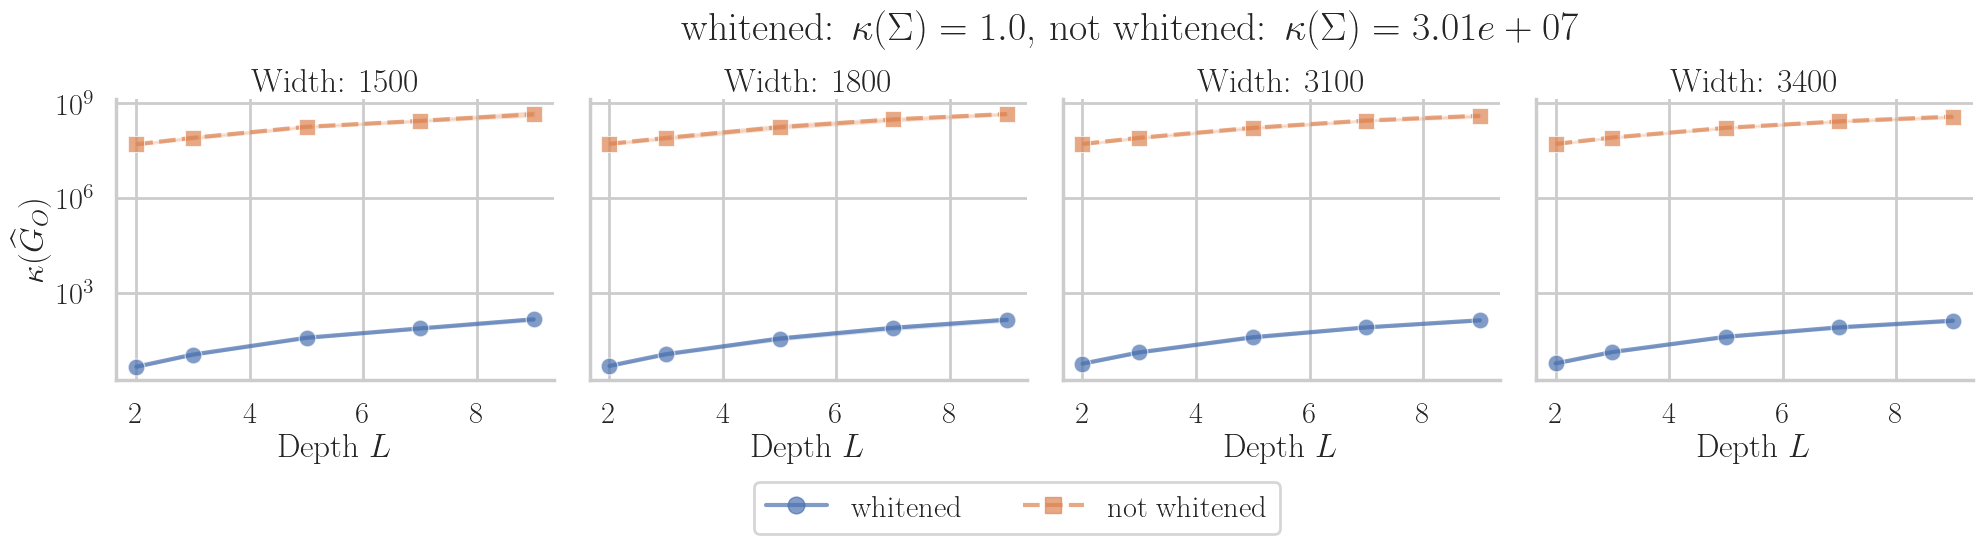

In [84]:
filename='whitenend_vs_not_whitened_cifar10_linNet'

whitenend_vs_not_whitened_relplot(df_conc_w, sigma, filename=filename, save=True)

/var/folders/yz/pp0mnv4s6qb6j8z0xkgwpdmr0000gq/T/ipykernel_35195/3769851341.py:3: UserWarning: The markers list has more values (5) than needed (2), which may not be intended.
  g = sns.lineplot(df_conc_w, x='depth',y='value', alpha=0.7, hue='normalization', style='normalization', size='width', style_order=['whitened','not whitened'], markers=markers)


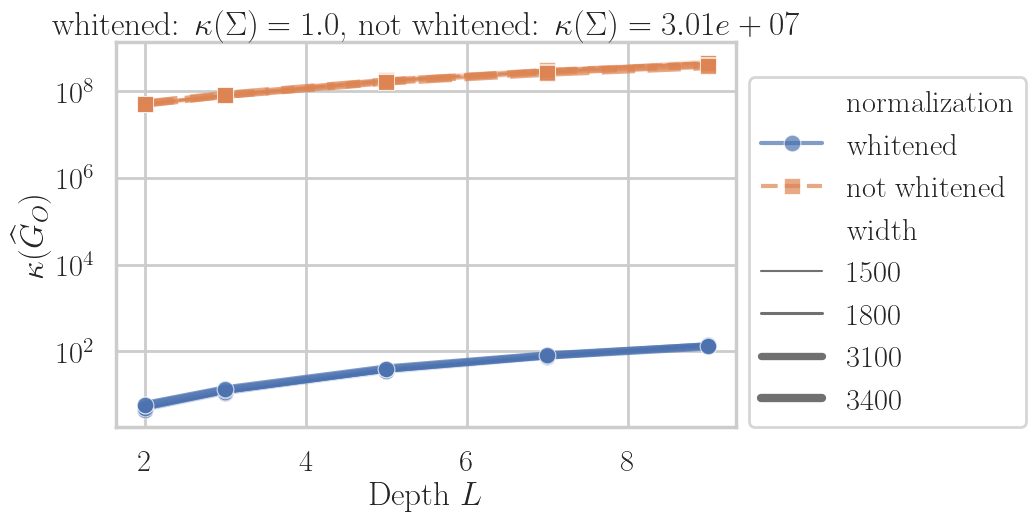

In [87]:
f = plt.figure(figsize=(8,5))

g = sns.lineplot(df_conc_w, x='depth',y='value', alpha=0.7, hue='normalization', style='normalization', size='width', style_order=['whitened','not whitened'], markers=markers)

# g.set(yscale='log')

g.set_xlabel('Depth $L$')
g.set_ylabel('$\kappa(\widehat{G}_O)$')

g.set_title('whitened: $\kappa(\Sigma)=1.0$, not whitened: $\kappa(\Sigma) = %.2e$' % sigma)

g.legend(loc=(1.02,0))

plt.yscale('log')

# f.savefig('whitenend_vs_not_whitened_cifar10_linNet_combined_plot.pdf', bbox_inches='tight')

/var/folders/yz/pp0mnv4s6qb6j8z0xkgwpdmr0000gq/T/ipykernel_35195/2796816897.py:5: UserWarning: The markers list has more values (5) than needed (2), which may not be intended.
  g = sns.lineplot(df_conc_w_fil, x='depth',y='value', alpha=1, hue='normalization', style='normalization', style_order=['whitened','not whitened'], markers=markers)


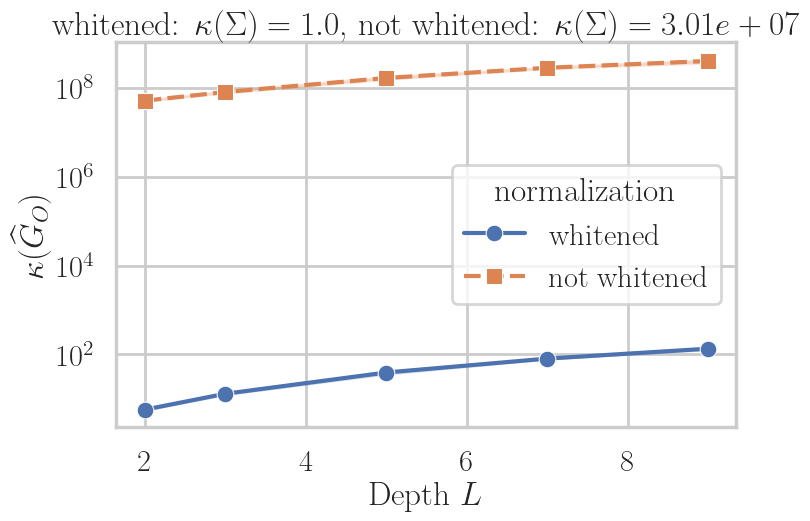

In [86]:
df_conc_w_fil = df_conc_w[df_conc_w['width']==3100]

f = plt.figure(figsize=(8,5))

g = sns.lineplot(df_conc_w_fil, x='depth',y='value', alpha=1, hue='normalization', style='normalization', style_order=['whitened','not whitened'], markers=markers)

g.set(yscale='log')

g.set_xlabel('Depth $L$')
g.set_ylabel('$\kappa(\widehat{G}_O)$')

g.set_title('whitened: $\kappa(\Sigma)=1.0$, not whitened: $\kappa(\Sigma) = %.2e$' % sigma)

# g.legend(loc=(1.02,0))

# g.fig.suptitle('whitened: $\kappa(\Sigma)=1.0$, not whitened: $\kappa(\Sigma) = %.2e$' % sigma)
# g.fig.subplots_adjust(top=0.8)

f.savefig('whitenend_vs_not_whitened_cifar10_linNet_single_plot_width3100.pdf', bbox_inches='tight')

##### 2. show convex combination bound is better: Cifar-10


In [88]:
def upperbound_comparison_relplot(df,title,filename=None,save=False):

    g = sns.relplot(df, x='depth',y='value', alpha=0.7, col='width', kind='line', hue='type', style='type', markers=markers)
    g.set(yscale='log')

    g.set_axis_labels('Depth $L$','$\kappa(\widehat{G}_O)$')
    
    g.fig.suptitle(title)
    g.fig.subplots_adjust(top=0.8)
    
    g.set_titles('Width: {col_name}')
    
    sns.move_legend(g, "lower center", bbox_to_anchor=(0.38, -0.1), ncol=3, title=None, frameon=True)

    
    if save==True:
        g.savefig(filepath+ filename + '.pdf')

In [89]:
filename='outer_prod_hessian_information_initialization_experiments_effect_of_width_and_depth_tightness_of_L_layer_condnum_bounds_cifar10_NOTwhitened_LinNet_num_init=3.pkl'
filename2='outer_prod_hessian_information_initialization_experiments_effect_of_width_and_depth_tightness_of_L_layer_condnum_bounds_cifar10_whitened_LinNet_num_init=3.pkl'

df_whitened = load_pandas_df(file_path, filename2)
df_whitened_cifar10 = filter_bound_3_out(df_whitened)

df_whitened_cifar10['depth'] +=1

/var/folders/yz/pp0mnv4s6qb6j8z0xkgwpdmr0000gq/T/ipykernel_35195/284700315.py:3: UserWarning: The markers list has more values (5) than needed (3), which may not be intended.
  g = sns.relplot(df, x='depth',y='value', alpha=0.7, col='width', kind='line', hue='type', style='type', markers=markers)


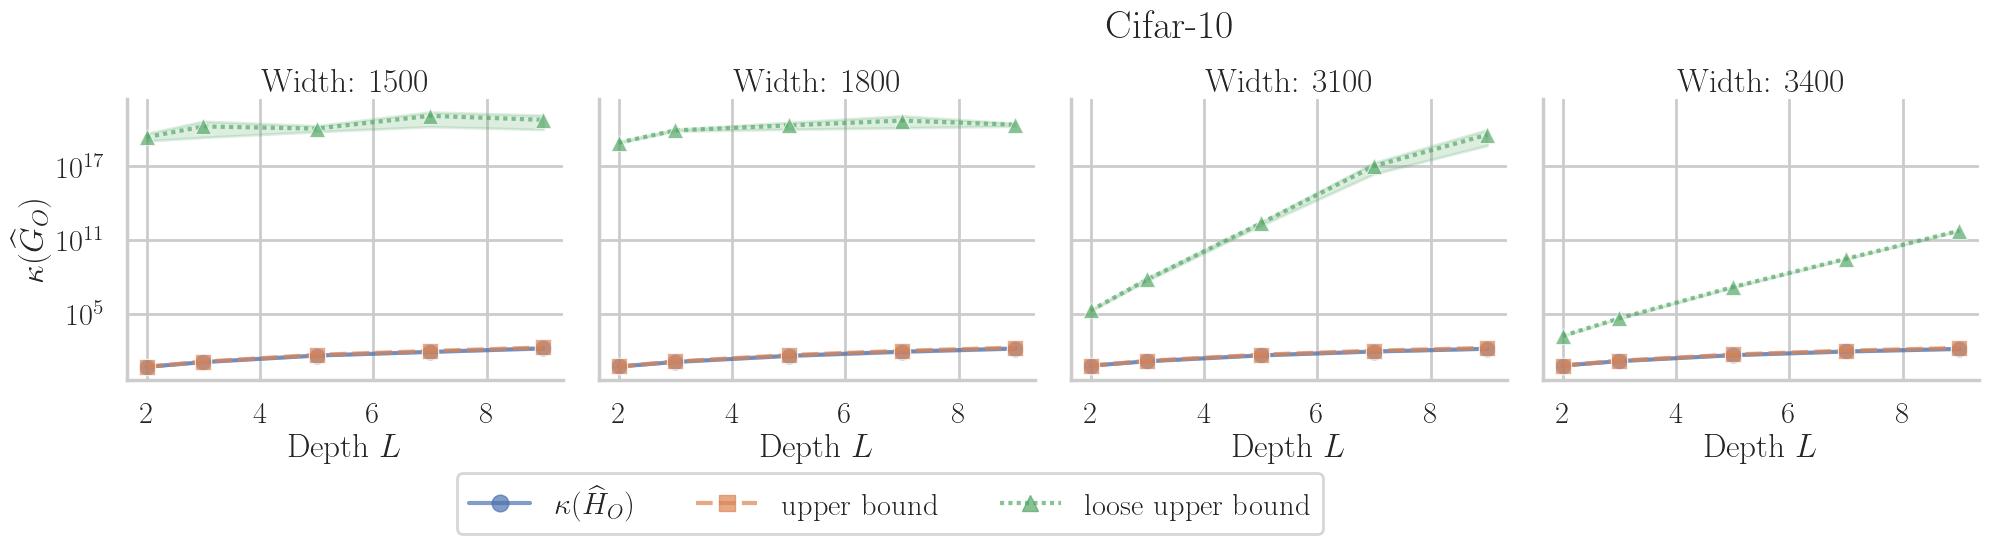

In [90]:
filename = 'upperbound_comparison_relplot_Cifar10_whitened'
title = 'Cifar-10'
upperbound_comparison_relplot(df_whitened_cifar10, title, filename=filename,save=True)

In [164]:
filename='outer_prod_hessian_information_initialization_experiments_effect_of_width_and_depth_tightness_of_L_layer_condnum_bounds_MNIST_NOTwhitened_LinNet_num_init=20.pkl'
filename2='outer_prod_hessian_information_initialization_experiments_effect_of_width_and_depth_tightness_of_L_layer_condnum_bounds_MNIST_whitened_LinNet_num_init=20.pkl'

df_whitened = load_pandas_df(file_path, filename2)
df_whitened_MNIST = filter_bound_3_out(df_whitened)

df_whitened_MNIST['depth'] += 1 

/var/folders/yz/pp0mnv4s6qb6j8z0xkgwpdmr0000gq/T/ipykernel_35195/284700315.py:3: UserWarning: The markers list has more values (5) than needed (3), which may not be intended.
  g = sns.relplot(df, x='depth',y='value', alpha=0.7, col='width', kind='line', hue='type', style='type', markers=markers)


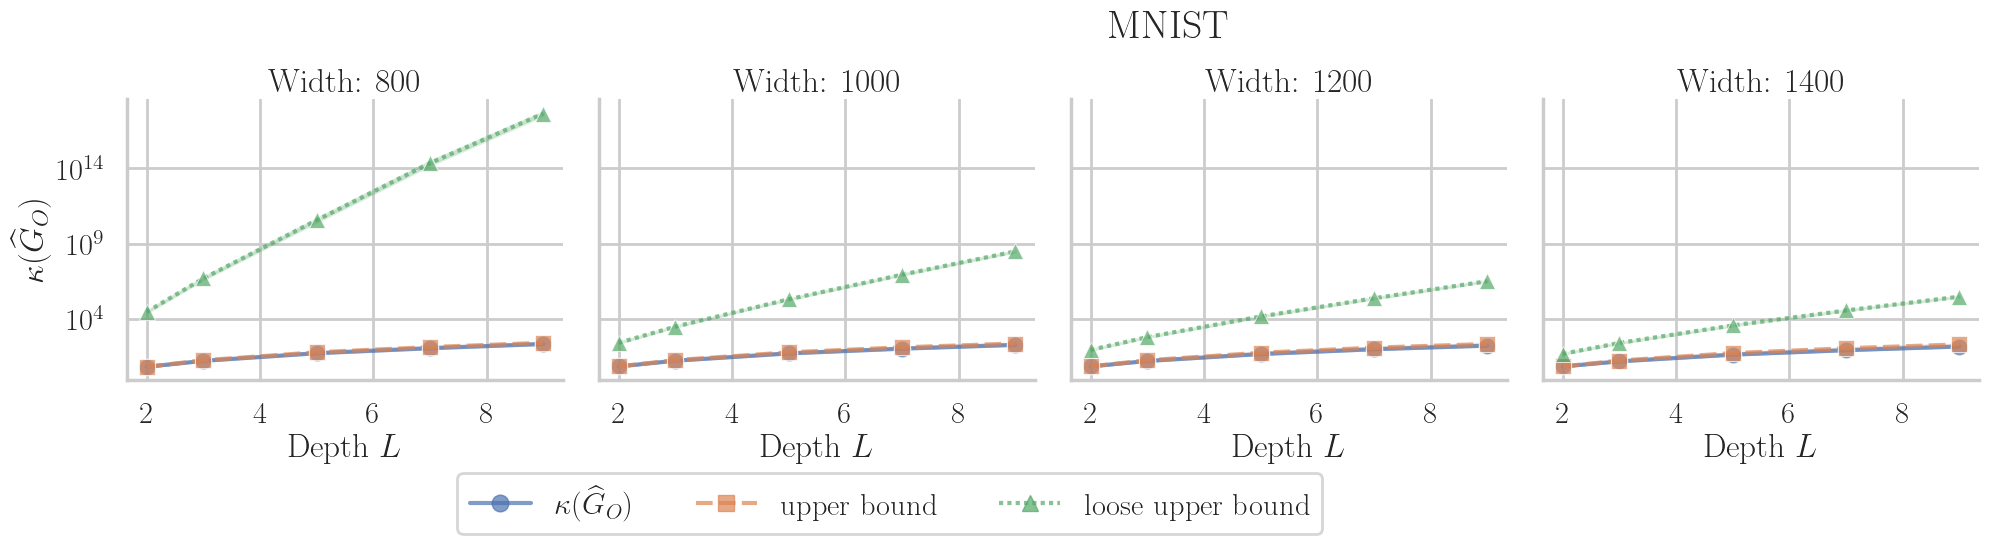

In [165]:
filename = 'upperbound_comparison_relplot_MNIST_whitened'
title = 'MNIST'
upperbound_comparison_relplot(df_whitened_MNIST, title, filename=filename,save=True)

/var/folders/yz/pp0mnv4s6qb6j8z0xkgwpdmr0000gq/T/ipykernel_35195/284700315.py:3: UserWarning: The markers list has more values (5) than needed (3), which may not be intended.
  g = sns.relplot(df, x='depth',y='value', alpha=0.7, col='width', kind='line', hue='type', style='type', markers=markers)


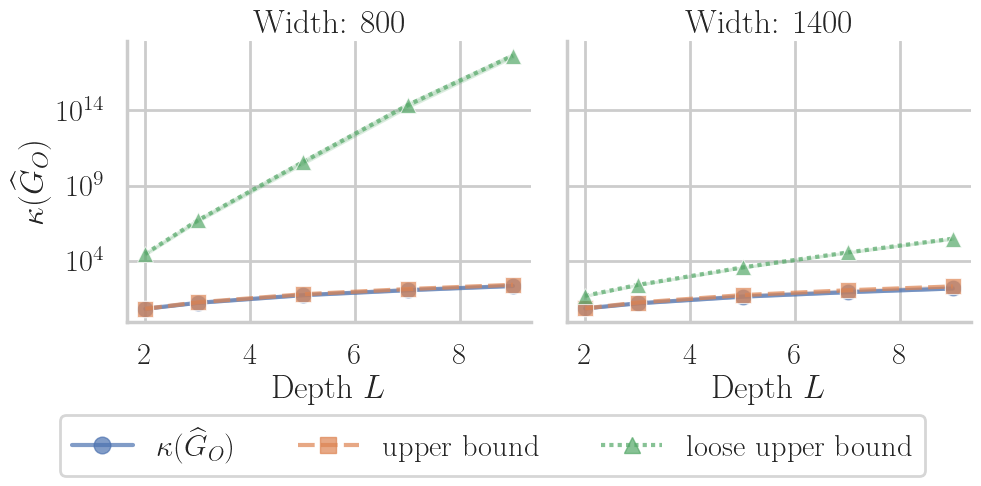

In [166]:
df_whitened_MNIST_fil = df_whitened_MNIST[df_whitened_MNIST['width'] != 1000]
df_whitened_MNIST_fil = df_whitened_MNIST_fil[df_whitened_MNIST_fil['width'] != 1200]


filename = 'upperbound_comparison_relplot_MNIST_whitened_two_subplots'
title = ''
upperbound_comparison_relplot(df_whitened_MNIST_fil, title, filename=filename,save=True)

##### 3. Fixed width with depth: MNIST, Cifar-10

In [94]:
def make_relplot_col_depth(df, title, log_scale=False, filename=None, save=False):
        
    g = sns.relplot(data=df, x='depth',y='value', alpha=0.7, col='width',hue='type', style='type', kind='line', markers=markers, legend='auto')
    
    g.set_axis_labels('Depth $L$','$\kappa(\widehat{G}_O)$')
    
    sig = df['cond_cov_xx'][0]
    g.set_titles(r'Width: {col_name}')
#     g.set_titles(r'Width: {col_name}, $\kappa(\Sigma)= %.1e$' %sig)
    
#     g.fig.suptitle(r'test', y=0.5)

    g.fig.suptitle(title)
    g.fig.subplots_adjust(top=0.8)
    
    if log_scale:
        g.set(yscale='log')
        
    sns.move_legend(g, "lower center", bbox_to_anchor=(0.47, -0.1), ncol=3, title=None, frameon=True)

        
    if save==True:
        g.savefig(filepath+ filename + '.pdf')

In [95]:
filename2='outer_prod_hessian_information_initialization_experiments_effect_of_width_and_depth_tightness_of_L_layer_condnum_bounds_MNIST_whitened_LinNet_num_init=20.pkl'

df_whitened = load_pandas_df(file_path, filename2)
df_whitened_MNIST = filter_bound_2_3_out(df_whitened)

df_whitened_MNIST['depth'] += 1

/var/folders/yz/pp0mnv4s6qb6j8z0xkgwpdmr0000gq/T/ipykernel_35195/1372939413.py:3: UserWarning: The markers list has more values (5) than needed (2), which may not be intended.
  g = sns.relplot(data=df, x='depth',y='value', alpha=0.7, col='width',hue='type', style='type', kind='line', markers=markers, legend='auto')


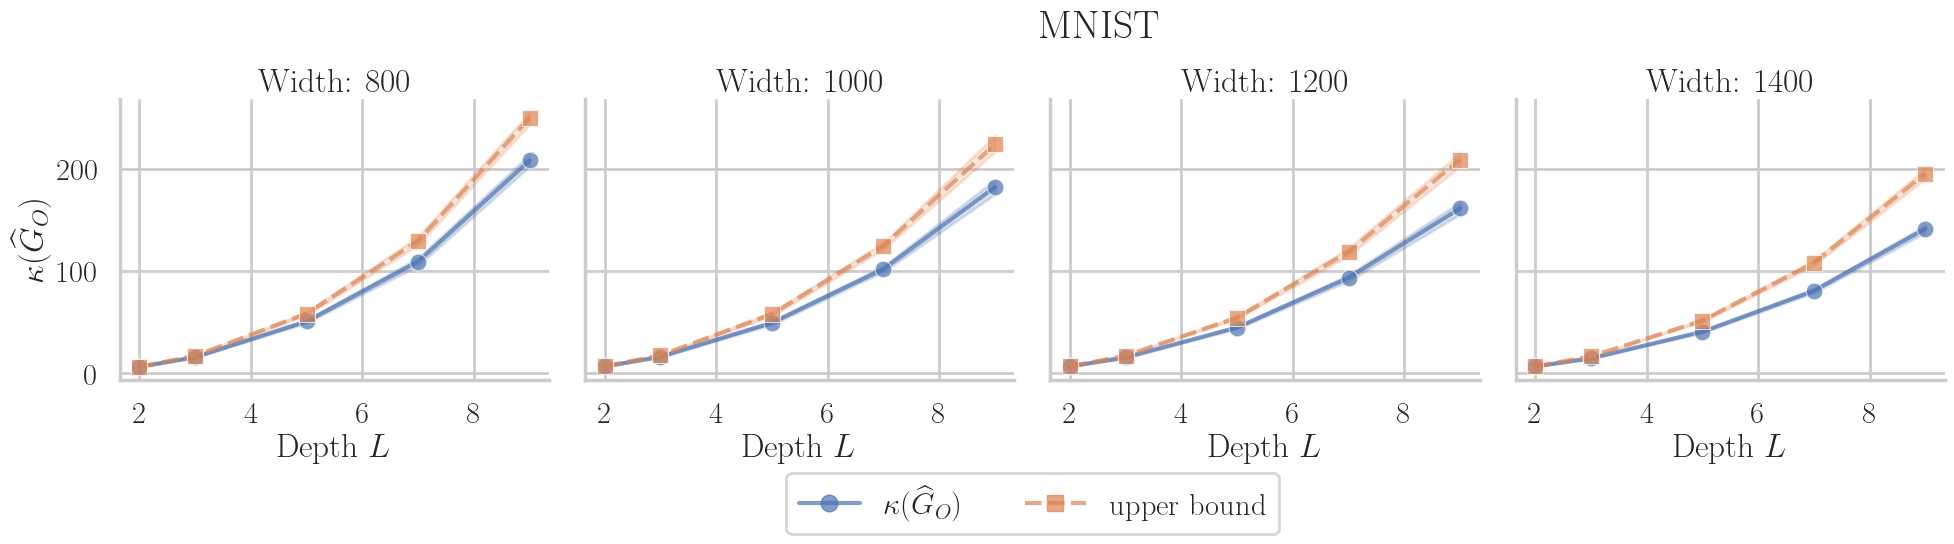

In [96]:
filename = 'fixed_width_w_depth_MNIST_whitened'
title = 'MNIST'

make_relplot_col_depth(df_whitened_MNIST, title, filename=filename, save=True)

<Axes: xlabel='width', ylabel='value'>

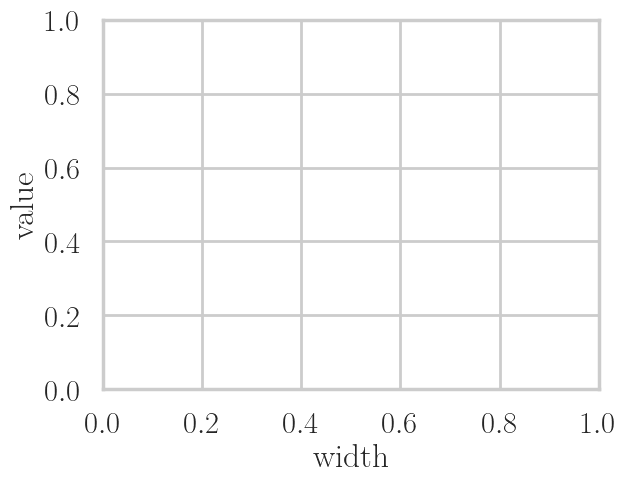

In [97]:
df_whitened_MNIST_fil_depth = df_whitened_MNIST[df_whitened_MNIST['depth']==1]

sns.lineplot(df_whitened_MNIST_fil_depth, x='width', y='value', hue='type')

/var/folders/yz/pp0mnv4s6qb6j8z0xkgwpdmr0000gq/T/ipykernel_35195/3993992056.py:8: UserWarning: The markers list has more values (5) than needed (2), which may not be intended.
  g = sns.relplot(data=df_whitened_MNIST_fil, x='depth',y='value', alpha=0.7, col='width',hue='type', style='type', kind='line', markers=markers)


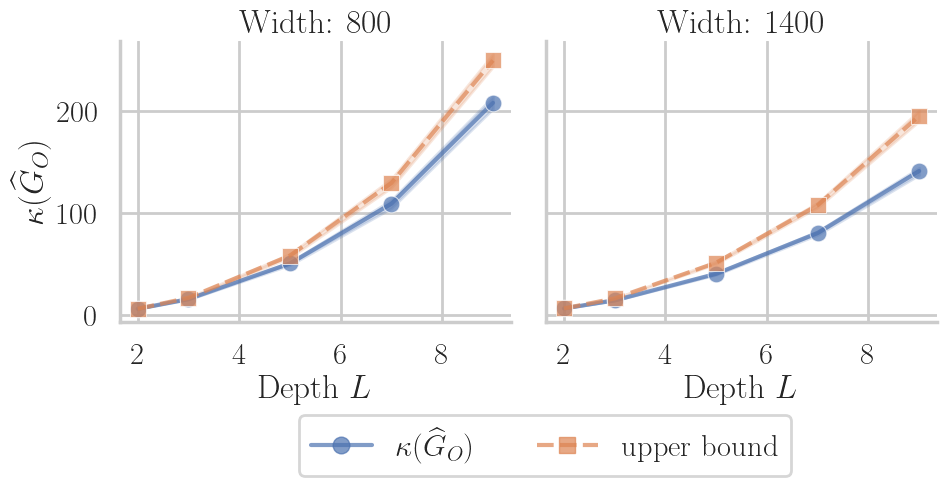

In [98]:
df_whitened_MNIST_fil = df_whitened_MNIST[df_whitened_MNIST['width'] != 1000]
df_whitened_MNIST_fil = df_whitened_MNIST_fil[df_whitened_MNIST_fil['width'] != 1200]

filename = 'fixed_width_w_depth_MNIST_whitened_two_plots'
title = 'MNIST'


g = sns.relplot(data=df_whitened_MNIST_fil, x='depth',y='value', alpha=0.7, col='width',hue='type', style='type', kind='line', markers=markers)
    
g.set_axis_labels('Depth $L$','$\kappa(\widehat{G}_O)$')

g.set_titles(r'Width: {col_name}')
#     g.set_titles(r'Width: {col_name}, $\kappa(\Sigma)= %.1e$' %sig)

#     g.fig.suptitle(r'test', y=0.5)

g.fig.subplots_adjust(top=0.8)
                
sns.move_legend(g, "lower center", bbox_to_anchor=(0.47, -0.1), ncol=3, title=None, frameon=True)

g.savefig(filepath + filename + '.pdf')

In [99]:
filename2='outer_prod_hessian_information_initialization_experiments_effect_of_width_and_depth_tightness_of_L_layer_condnum_bounds_Cifar10_whitened_LinNet_num_init=3.pkl'

df_whitened = load_pandas_df(file_path, filename2)
df_whitened_cifar10 = filter_bound_2_3_out(df_whitened)

df_whitened_cifar10['depth'] += 1

/var/folders/yz/pp0mnv4s6qb6j8z0xkgwpdmr0000gq/T/ipykernel_35195/1372939413.py:3: UserWarning: The markers list has more values (5) than needed (2), which may not be intended.
  g = sns.relplot(data=df, x='depth',y='value', alpha=0.7, col='width',hue='type', style='type', kind='line', markers=markers, legend='auto')


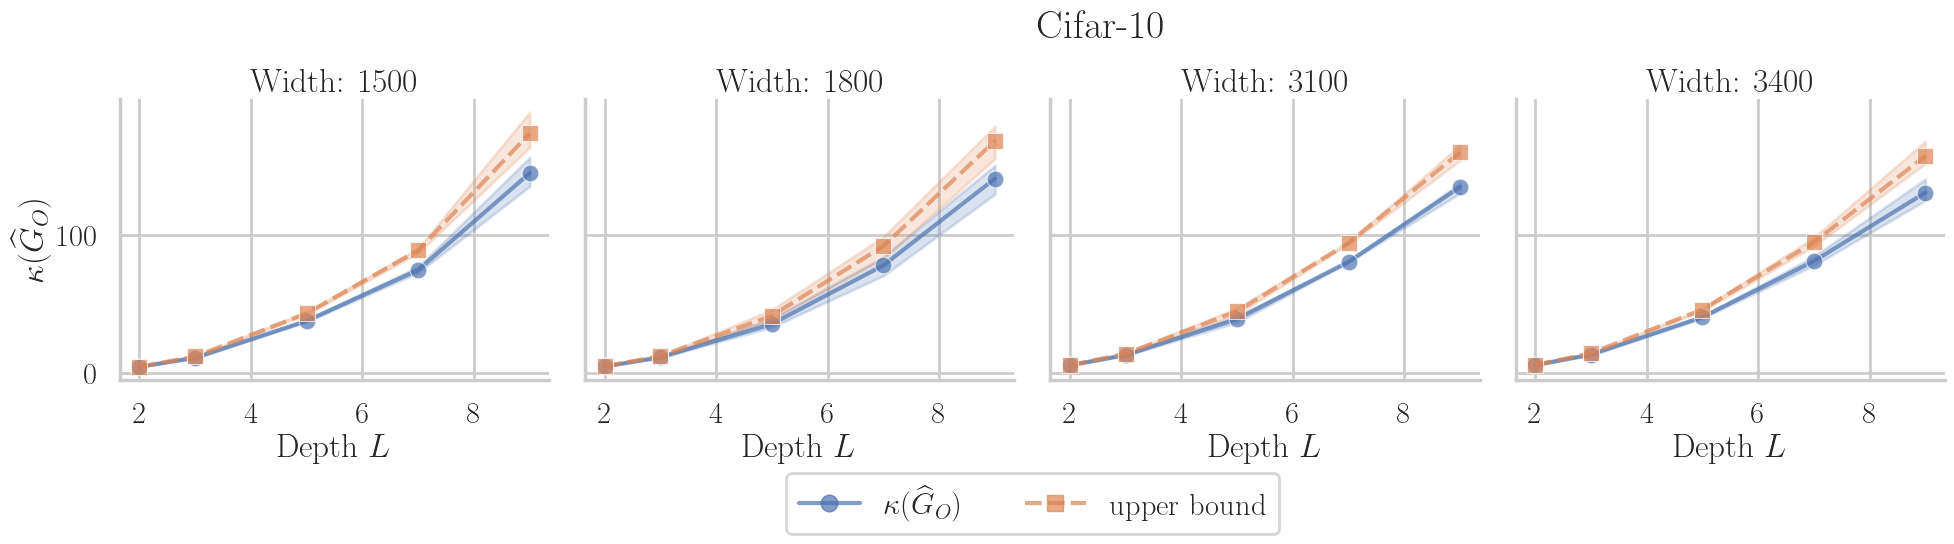

In [100]:
filename = 'fixed_width_w_depth_Cifar10_whitened'
title = 'Cifar-10'
make_relplot_col_depth(df_whitened_cifar10, title, filename=filename, save=True)

/var/folders/yz/pp0mnv4s6qb6j8z0xkgwpdmr0000gq/T/ipykernel_35195/1372939413.py:3: UserWarning: The markers list has more values (5) than needed (2), which may not be intended.
  g = sns.relplot(data=df, x='depth',y='value', alpha=0.7, col='width',hue='type', style='type', kind='line', markers=markers, legend='auto')


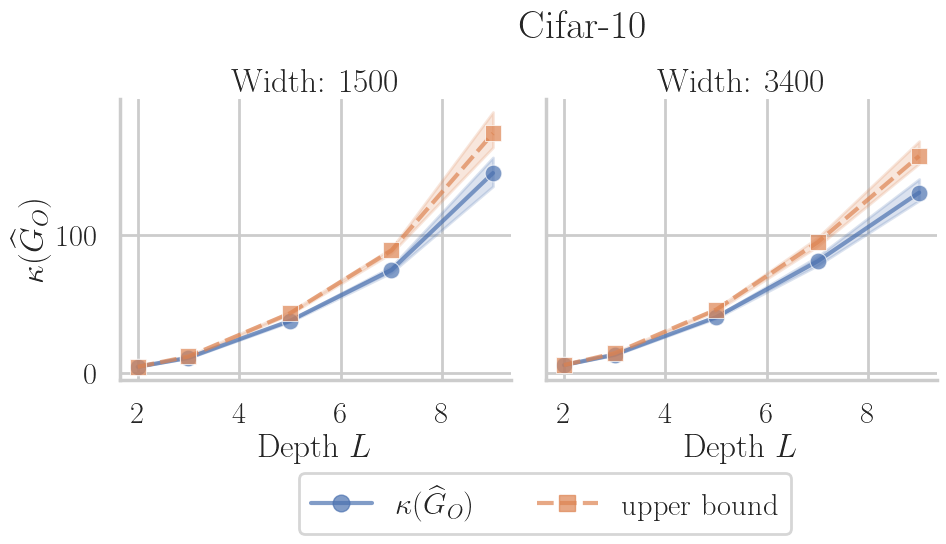

In [101]:
df_whitened_cifar10_fil = df_whitened_cifar10[df_whitened_cifar10['width'] != 1800]
df_whitened_cifar10_fil = df_whitened_cifar10_fil[df_whitened_cifar10_fil['width'] != 3100]

filename = 'fixed_width_w_depth_Cifar10_whitened_two_plots'
title = 'Cifar-10'
make_relplot_col_depth(df_whitened_cifar10_fil, title, filename=filename, save=True)

##### 4. Width proportional with depth: smaller constant: MNIST


In [102]:
def make_relplot_width_prop_w_depth(df, title, filename=None, save=False):
    f = plt.figure(figsize=(8,5))

    g = sns.lineplot(data=df, x='depth',y='value', alpha=0.7, hue='type', style='type', markers=markers, legend='auto')

#     g.set(yscale='log')
#     g.set(ylim=[5,25])
    g.set_xlabel('Depth $L$') 
    g.set_ylabel('$\kappa(\widehat{G}_O)$')

    g.set_title(title)
    
#     sns.move_legend(g, "lower center", bbox_to_anchor=(0.47, -0.5), ncol=3, title=None, frameon=True)

    
#     print(g)
    if save==True:
        f.savefig(filepath+ filename + '.pdf', bbox_inches='tight')

In [103]:
filename = 'outer_prod_hessian_information_initialization_experiments_MNIST_whitened_num_init=10_d=784_n=50000_convex_comb_scaling_width_w_depth_smaller_factor.pkl'
df1 = load_pandas_df(file_path, filename)

filename = 'outer_prod_hessian_information_initialization_experiments_MNIST_whitened_num_init=10_d=784_n=50000_convex_comb_scaling_width_w_depth_smaller_factor_L=8.pkl'
df2 = load_pandas_df(file_path, filename)

df_width_scaled_w_depth_1 = pd.concat([df1,df2])

df_width_scaled_w_depth_1 = filter_bound_2_3_out(df_width_scaled_w_depth_1)



df_width_scaled_w_depth_1['depth'] += 1

/var/folders/yz/pp0mnv4s6qb6j8z0xkgwpdmr0000gq/T/ipykernel_35195/660709212.py:4: UserWarning: The markers list has more values (5) than needed (2), which may not be intended.
  g = sns.lineplot(data=df, x='depth',y='value', alpha=0.7, hue='type', style='type', markers=markers, legend='auto')


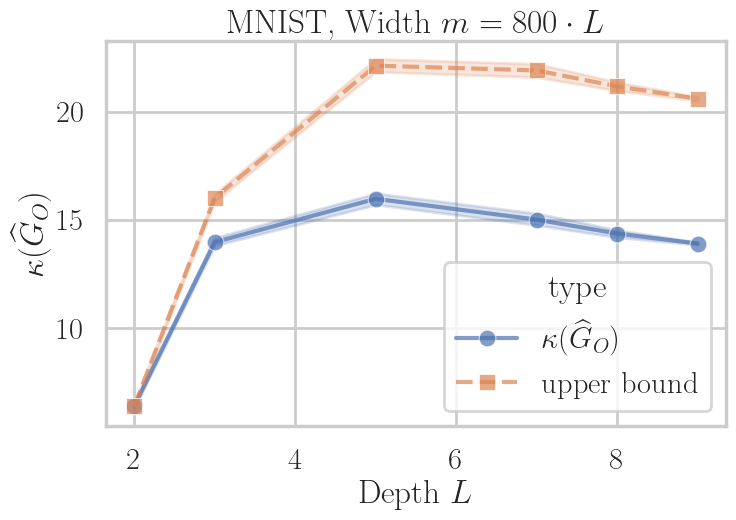

In [104]:
filename = 'width_prop_w_depth_small_factor_MNIST_whitened'

title = 'MNIST, Width $m= 800 \cdot L$'

make_relplot_width_prop_w_depth(df_width_scaled_w_depth_1, title, filename=filename, save=True)

##### 5. Width proportional with depth: larger constant: MNIST

In [105]:
def filter_l_out(df):
    df = df[df['l']!=1]
    df = df[df['l']!=2]
    df = df[df['l']!=3]
    df = df[df['l']!=4]
    df = df[df['l']!=5]
    df = df[df['l']!=6]
    return df

In [106]:
filename1 = 'outer_prod_hessian_information_initialization_experiments_MNIST_whitened_num_init=10_d=784_n=50000_convex_comb_scaling_width_w_depth_L=1.pkl'
filename2 = 'outer_prod_hessian_information_initialization_experiments_MNIST_whitened_num_init=10_d=784_n=50000_convex_comb_scaling_width_w_depth_L=2.pkl'
filename3 = 'outer_prod_hessian_information_initialization_experiments_MNIST_whitened_num_init=10_d=784_n=50000_convex_comb_scaling_width_w_depth_L=4.pkl'
filename4 = 'outer_prod_hessian_information_initialization_experiments_MNIST_whitened_num_init=10_d=784_n=50000_convex_comb_scaling_width_w_depth_L=6.pkl'
filename5 = 'outer_prod_hessian_information_initialization_experiments_MNIST_whitened_num_init=10_d=784_n=50000_convex_comb_scaling_width_w_depth_L=8.pkl'

df1 = load_pandas_df(file_path, filename1)
df2 = load_pandas_df(file_path, filename2)
df3 = load_pandas_df(file_path, filename3)
df4 = load_pandas_df(file_path, filename4)
df5 = load_pandas_df(file_path, filename5)


df_width_scaled_w_depth_2 = pd.concat([df1,df2,df3,df4,df5])



df_width_scaled_w_depth_2 = filter_bound_2_3_out(df_width_scaled_w_depth_2)
df_width_scaled_w_depth_2 = filter_l_out(df_width_scaled_w_depth_2)

df_width_scaled_w_depth_2['depth'] += 1

/var/folders/yz/pp0mnv4s6qb6j8z0xkgwpdmr0000gq/T/ipykernel_35195/660709212.py:4: UserWarning: The markers list has more values (5) than needed (2), which may not be intended.
  g = sns.lineplot(data=df, x='depth',y='value', alpha=0.7, hue='type', style='type', markers=markers, legend='auto')


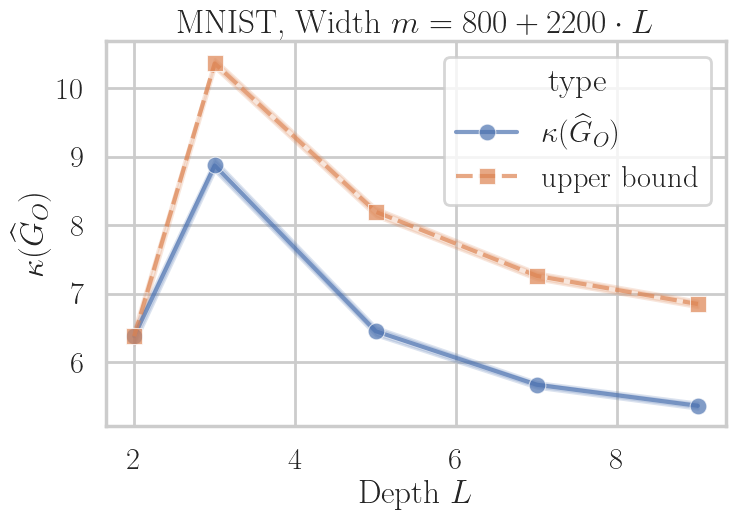

In [107]:
filename = 'width_prop_w_depth_larger_factor_MNIST_whitened'

title = 'MNIST, Width $m = 800 + 2200\cdot L$'
make_relplot_width_prop_w_depth(df_width_scaled_w_depth_2, title=title, filename=filename, save=True)

In [108]:
df_width_scaled_w_depth_1.insert(0,'scaling','$800 \cdot (L-1)$')
df_width_scaled_w_depth_2.insert(0,'scaling','$800 + 2200 \cdot (L-1)$')


df_width_scaled_w_depth_conc = pd.concat([df_width_scaled_w_depth_1,df_width_scaled_w_depth_2])

/var/folders/yz/pp0mnv4s6qb6j8z0xkgwpdmr0000gq/T/ipykernel_35195/1082415875.py:3: UserWarning: The markers list has more values (5) than needed (2), which may not be intended.
  g = sns.relplot(df_width_scaled_w_depth_conc, alpha=0.7, x='depth', y='value', col='scaling', hue='type', markers=markers, style='type', kind='line')


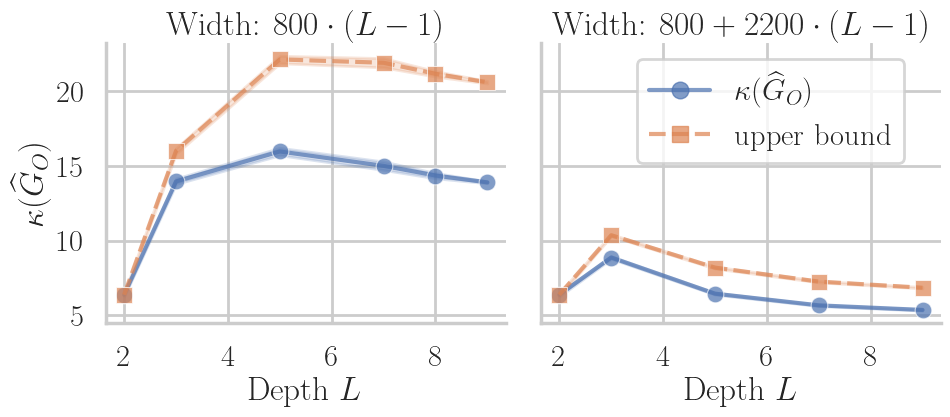

In [110]:
filename = 'width_prop_w_depth_MNIST_whitened'

g = sns.relplot(df_width_scaled_w_depth_conc, alpha=0.7, x='depth', y='value', col='scaling', hue='type', markers=markers, style='type', kind='line')

g.set_titles('Width: {col_name}')

g.set_axis_labels('Depth $L$','$\kappa(\widehat{G}_O)$')

# g.fig.suptitle('MNIST')

g.fig.subplots_adjust(top=0.8)

sns.move_legend(g, "lower center", bbox_to_anchor=(0.645, 0.53), ncol=1, title=None, frameon=True)

       
g.savefig(filepath+ filename + '.pdf')

### Linear vs. Residual networks

##### 1. ResNet, beta comparison: MNIST, Cifar-10


In [111]:
file_name = 'outer_prod_hessian_information_initialization_experiments_effect_of_width_and_depth_tightness_of_L_layer_condnum_bounds_MNIST_whitened_ResNet_beta=1_num_init=20.pkl'
df = load_pandas_df(file_path, file_name)
df_res = filter_bound_2_3_out(df)

file_name = 'outer_prod_hessian_information_initialization_experiments_effect_of_width_and_depth_tightness_of_L_layer_condnum_bounds_MNIST_whitened_ResNet_beta=1_L_num_init=20.pkl'
df = load_pandas_df(file_path, file_name)
df_res_1L = filter_bound_2_3_out(df)

file_name = 'outer_prod_hessian_information_initialization_experiments_effect_of_width_and_depth_tightness_of_L_layer_condnum_bounds_MNIST_whitened_ResNet_beta=1_sqrt(L)_num_init=20.pkl'
df = load_pandas_df(file_path, file_name)
df_res_1sqrtL = filter_bound_2_3_out(df)

df_res.insert(2,'beta','$1$')
df_res_1sqrtL.insert(2,'beta','$1/\sqrt{L}$')
df_res_1L.insert(2,'beta','$1/L$')

df_conc_res_MNIST = pd.concat([df_res,df_res_1sqrtL,df_res_1L])
df_conc_res_MNIST['depth'] += 1

In [112]:
def make_relplot_Res_beta_comparison_col_depth(df, title, log_scale=False, filename=None, save=False):
        
    g = sns.relplot(data=df, x='depth',y='value',col='width',alpha=0.7, hue='beta', style='type', kind='line', markers=markers, legend='auto')
    
    g.set_axis_labels('Depth $L$','$\kappa(\widehat{G}_O)$')
    
    g.set_titles('Width: {col_name}')
    
    g.fig.suptitle(title)
#     g.add_legend(title="")
    g.fig.subplots_adjust(top=0.8)
    
    sns.move_legend(g, "lower center", bbox_to_anchor=(0.45, -0.43), ncol=2, title=None, frameon=True)

    
    
    if log_scale:
        g.set(yscale='log')
        
    if save==True:
        g.savefig(filepath+ filename + '.pdf')

/var/folders/yz/pp0mnv4s6qb6j8z0xkgwpdmr0000gq/T/ipykernel_35195/1288794977.py:3: UserWarning: The markers list has more values (5) than needed (2), which may not be intended.
  g = sns.relplot(data=df, x='depth',y='value',col='width',alpha=0.7, hue='beta', style='type', kind='line', markers=markers, legend='auto')


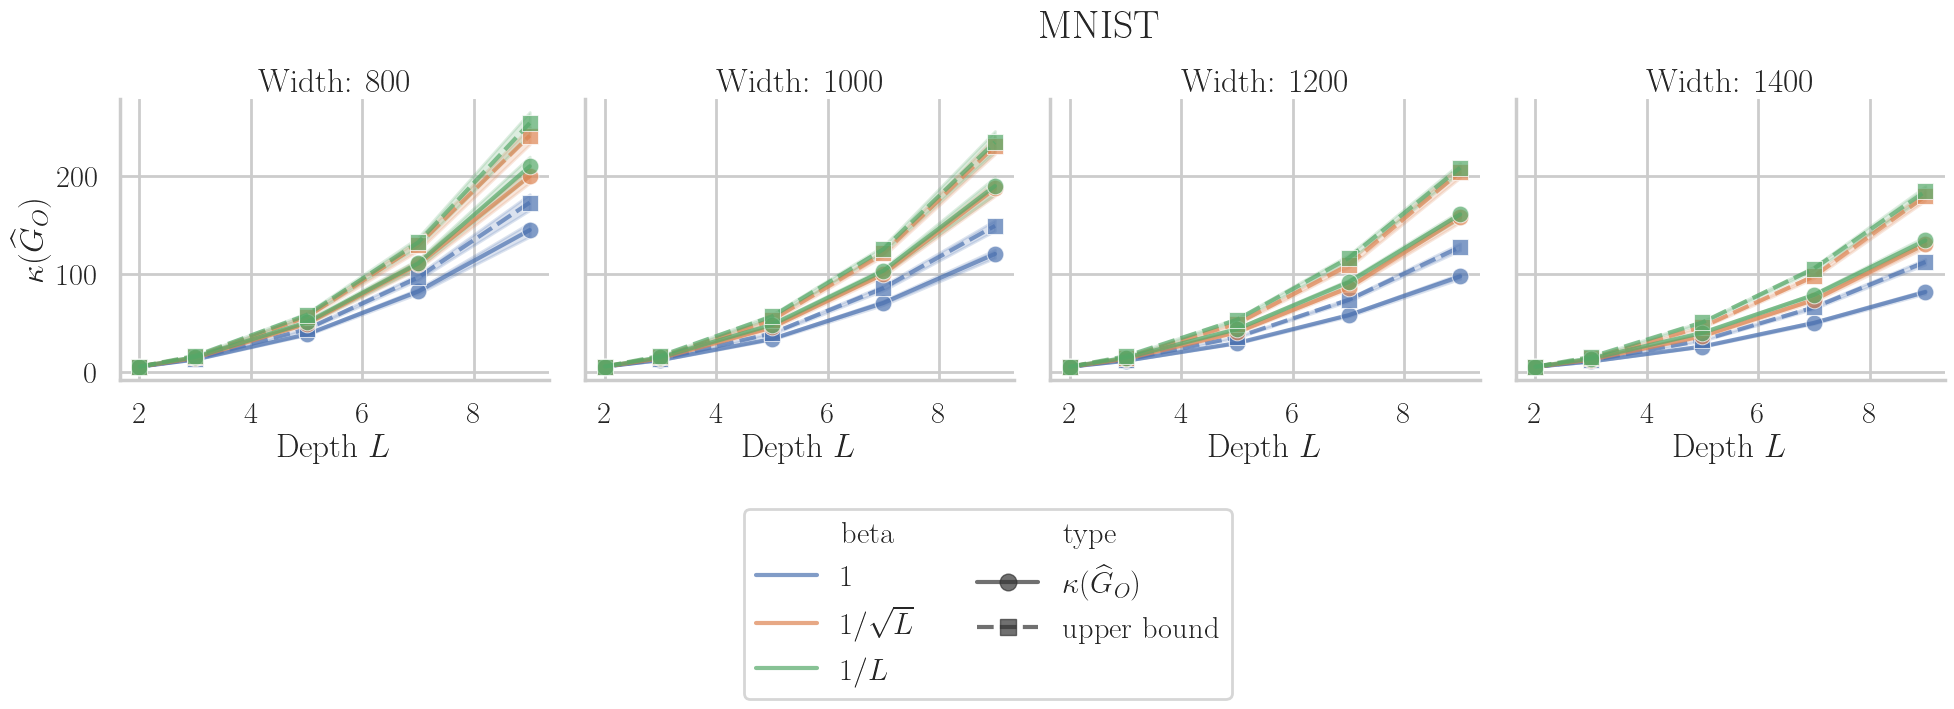

In [113]:
filename='MNIST_whitened_Resnet_beta_comparison'
title='MNIST'

make_relplot_Res_beta_comparison_col_depth(df_conc_res_MNIST,title, filename=filename,save=True)

In [114]:
file_name = 'outer_prod_hessian_information_initialization_experiments_effect_of_width_and_depth_tightness_of_L_layer_condnum_bounds_cifar10_whitened_ResNet_beta=1_num_init=3.pkl'
df = load_pandas_df(file_path, file_name)
df_res = filter_bound_2_3_out(df)

file_name = 'outer_prod_hessian_information_initialization_experiments_effect_of_width_and_depth_tightness_of_L_layer_condnum_bounds_cifar10_whitened_ResNet_beta=1_L_num_init=3.pkl'
df = load_pandas_df(file_path, file_name)
df_res_1L = filter_bound_2_3_out(df)

file_name = 'outer_prod_hessian_information_initialization_experiments_effect_of_width_and_depth_tightness_of_L_layer_condnum_bounds_cifar10_whitened_ResNet_beta=1_sqrt(L)_num_init=3.pkl'
df = load_pandas_df(file_path, file_name)
df_res_1sqrtL = filter_bound_2_3_out(df)

df_res.insert(2,'beta','$1$')
df_res_1sqrtL.insert(2,'beta','$1/\sqrt{L}$')
df_res_1L.insert(2,'beta','$1/L$')

df_conc_res_Cifar10 = pd.concat([df_res,df_res_1sqrtL,df_res_1L])
df_conc_res_Cifar10['depth'] += 1

/var/folders/yz/pp0mnv4s6qb6j8z0xkgwpdmr0000gq/T/ipykernel_35195/1288794977.py:3: UserWarning: The markers list has more values (5) than needed (2), which may not be intended.
  g = sns.relplot(data=df, x='depth',y='value',col='width',alpha=0.7, hue='beta', style='type', kind='line', markers=markers, legend='auto')


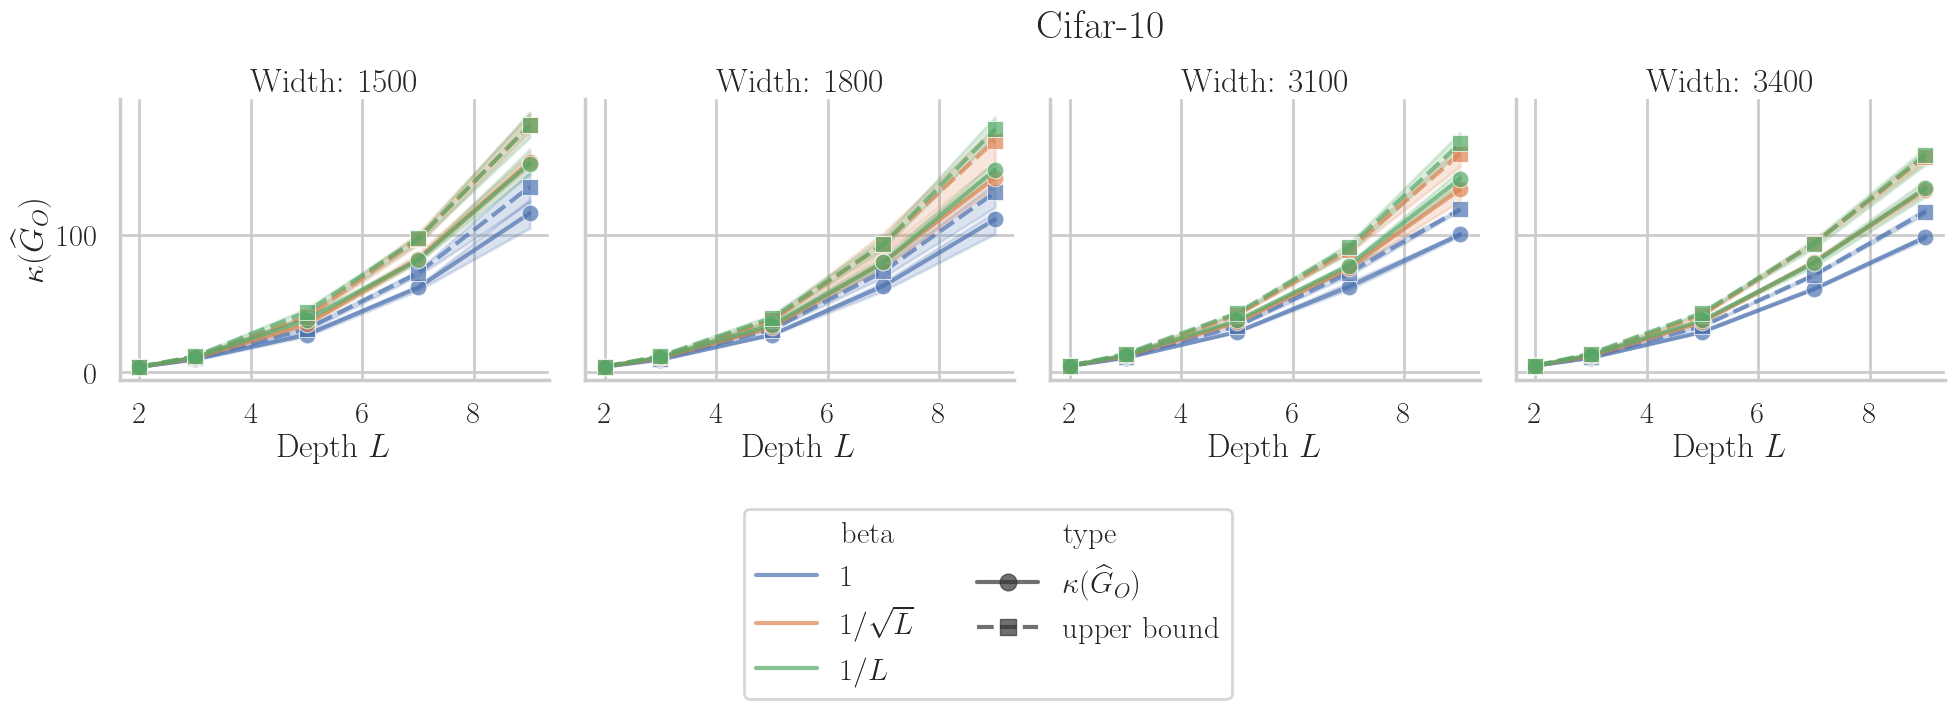

In [115]:
filename='Cifar10_whitened_Resnet_beta_comparison'
title='Cifar-10'
make_relplot_Res_beta_comparison_col_depth(df_conc_res_Cifar10,title,filename=filename,save=True)

##### 2. Linear vs. ResNet beta=1: MNIST, Cifar-10

In [116]:
file_name = 'outer_prod_hessian_information_initialization_experiments_effect_of_width_and_depth_tightness_of_L_layer_condnum_bounds_cifar10_whitened_ResNet_beta=1_num_init=3.pkl'
df = load_pandas_df(file_path, file_name)
df_res = filter_bound_2_3_out(df)

file_name = 'outer_prod_hessian_information_initialization_experiments_effect_of_width_and_depth_tightness_of_L_layer_condnum_bounds_cifar10_whitened_LinNet_num_init=3.pkl'
df = load_pandas_df(file_path, file_name)
df_lin = filter_bound_2_3_out(df)

# df_res.insert(2,'beta','$1$')
# df_res_1sqrtL.insert(2,'beta','$1/\sqrt{L}$')
# df_res_1L.insert(2,'beta','$1/L$')

df_conc_lin_vs_res_Cifar10 = pd.concat([df_res,df_lin])
df_conc_lin_vs_res_Cifar10['depth'] += 1

In [117]:
def make_relplot_LinvsRes_col_depth(df, title, log_scale=False, filename=None, save=False):
        
    g = sns.relplot(data=df, x='depth',y='value',col='width', style='type', hue='network', kind='line', markers=markers, legend='brief')
    
    g.set_axis_labels('Depth $L$','$\kappa(\widehat{G}_O)$')
    
    g.set_titles('Width: {col_name}')
    
    g.fig.suptitle(title)
#     g.add_legend(title="")
    g.fig.subplots_adjust(top=0.8)
    
    if log_scale:
        g.set(yscale='log')
        
    # Access the underlying FacetGrid and remove column titles from the legend
    for ax in g.axes.flat:
        legend = ax.get_legend()
        if legend:
            print('test')
            legend.set_title('')
            legend.set_bbox_to_anchor((1, 1))  # Adjust legend position if needed
        
    sns.move_legend(g, "lower center", bbox_to_anchor=(0.48, -0.28), ncol=2, title=None, frameon=True)

        
#     g.set(ylim=[1,1e10])
    if save==True:
        g.savefig(filepath+ filename + '.pdf')

/var/folders/yz/pp0mnv4s6qb6j8z0xkgwpdmr0000gq/T/ipykernel_35195/842566404.py:3: UserWarning: The markers list has more values (5) than needed (2), which may not be intended.
  g = sns.relplot(data=df, x='depth',y='value',col='width', style='type', hue='network', kind='line', markers=markers, legend='brief')


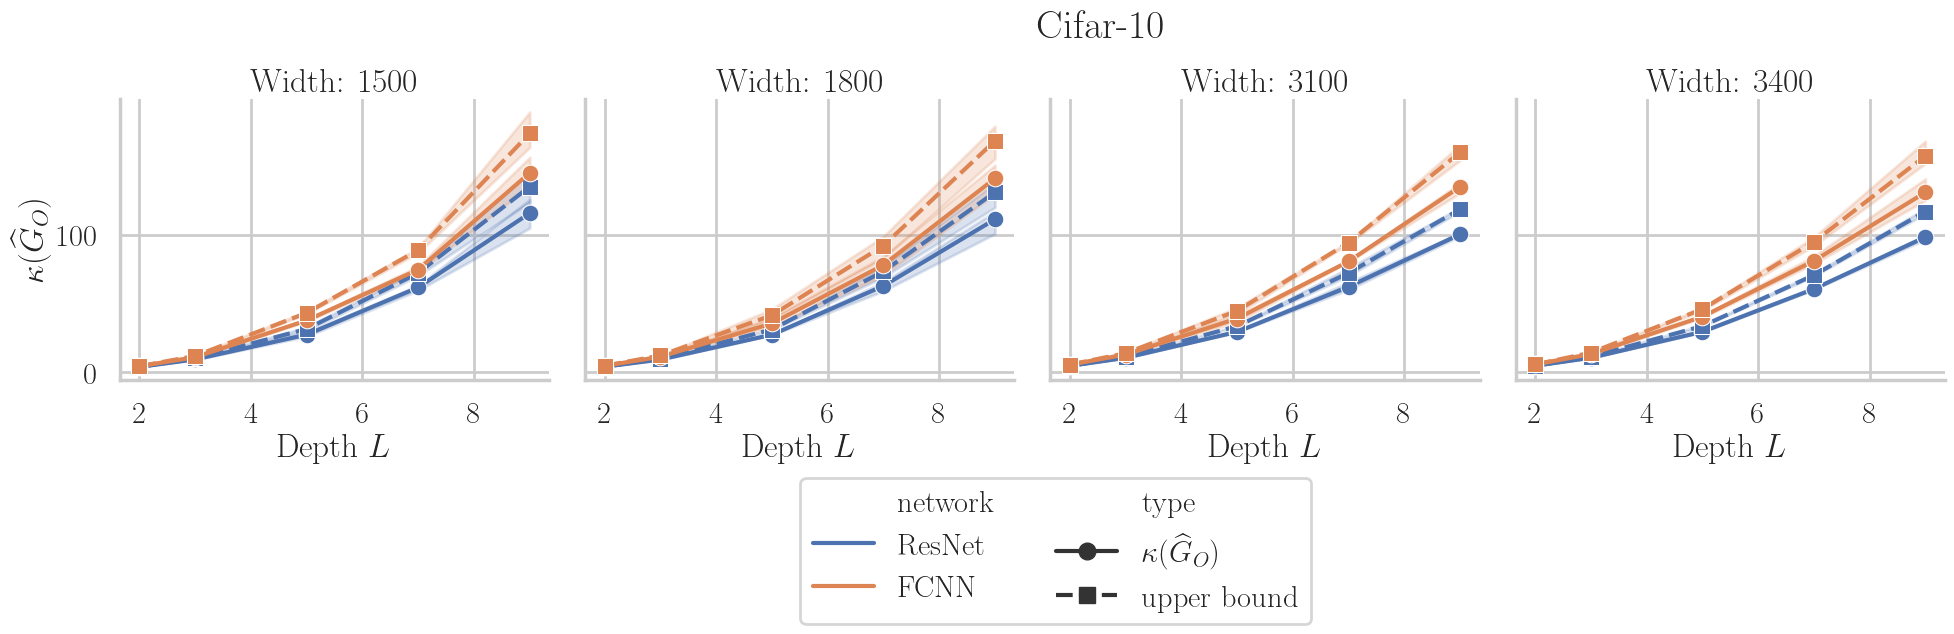

In [118]:
filename='Cifar10_whitened_LinNet_vs_ResNet_beta=1_comparison'
title='Cifar-10'
# 
make_relplot_LinvsRes_col_depth(df_conc_lin_vs_res_Cifar10, title,filename=filename, save=True)


In [119]:
file_name = 'outer_prod_hessian_information_initialization_experiments_effect_of_width_and_depth_tightness_of_L_layer_condnum_bounds_MNIST_whitened_ResNet_beta=1_num_init=20.pkl'
df = load_pandas_df(file_path, file_name)
df_res = filter_bound_2_3_out(df)

file_name = 'outer_prod_hessian_information_initialization_experiments_effect_of_width_and_depth_tightness_of_L_layer_condnum_bounds_MNIST_whitened_LinNet_num_init=20.pkl'
df = load_pandas_df(file_path, file_name)
df_lin = filter_bound_2_3_out(df)

# df_res.insert(2,'beta','$1$')
# df_res_1sqrtL.insert(2,'beta','$1/\sqrt{L}$')
# df_res_1L.insert(2,'beta','$1/L$')

df_conc_lin_vs_res_MNIST = pd.concat([df_res,df_lin])
df_conc_lin_vs_res_MNIST['depth'] += 1

/var/folders/yz/pp0mnv4s6qb6j8z0xkgwpdmr0000gq/T/ipykernel_35195/842566404.py:3: UserWarning: The markers list has more values (5) than needed (2), which may not be intended.
  g = sns.relplot(data=df, x='depth',y='value',col='width', style='type', hue='network', kind='line', markers=markers, legend='brief')


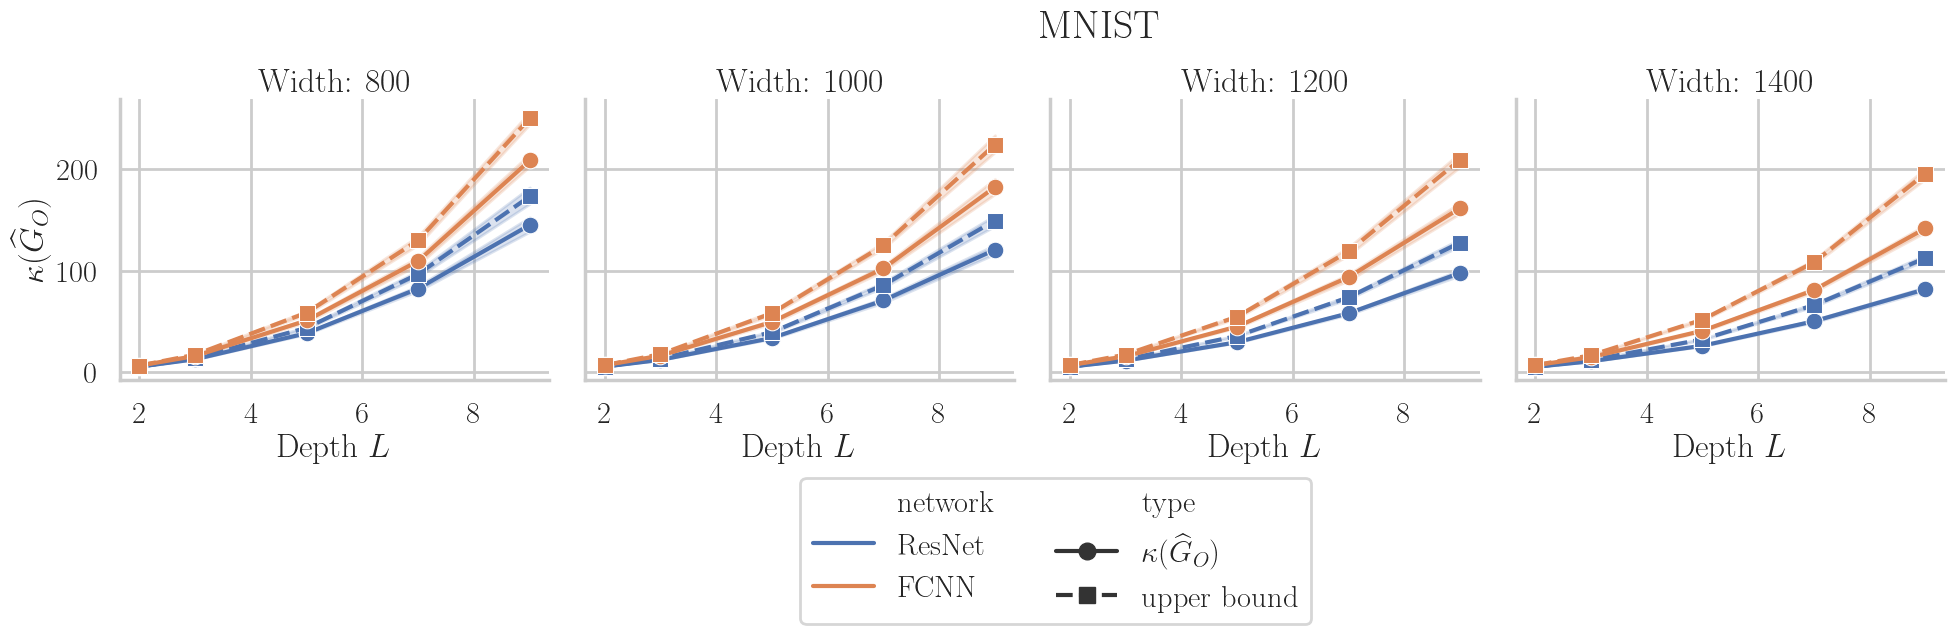

In [120]:
filename='MNIST_whitened_LinNet_vs_ResNet_beta=1_comparison'
title='MNIST'
# 
make_relplot_LinvsRes_col_depth(df_conc_lin_vs_res_MNIST, title,filename=filename, save=True)


/var/folders/yz/pp0mnv4s6qb6j8z0xkgwpdmr0000gq/T/ipykernel_35195/842566404.py:3: UserWarning: The markers list has more values (5) than needed (2), which may not be intended.
  g = sns.relplot(data=df, x='depth',y='value',col='width', style='type', hue='network', kind='line', markers=markers, legend='brief')


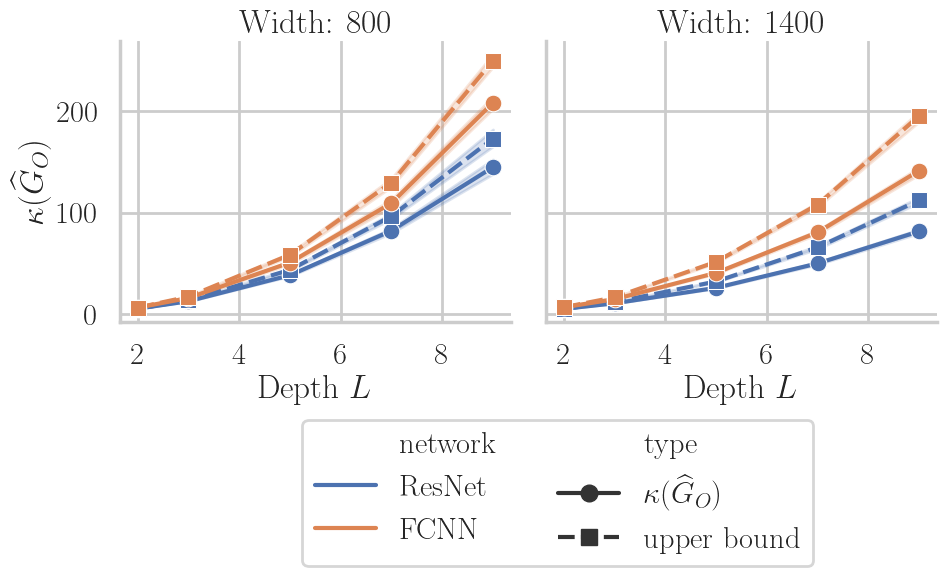

In [121]:
df_conc_lin_vs_res_MNIST_fil = df_conc_lin_vs_res_MNIST[df_conc_lin_vs_res_MNIST['width'] != 1000]
df_conc_lin_vs_res_MNIST_fil = df_conc_lin_vs_res_MNIST_fil[df_conc_lin_vs_res_MNIST_fil['width'] != 1200]

filename='MNIST_whitened_LinNet_vs_ResNet_beta=1_comparison_two_subplots'
title=''
# 
make_relplot_LinvsRes_col_depth(df_conc_lin_vs_res_MNIST_fil, title,filename=filename, save=True)


In [122]:
df_conc_lin_vs_res_MNIST_fil

dataset network  cond_cov_xx  input_dim  output_dim  width  depth  \
0      mnist  ResNet     1.000001        784          10    800      2   
1      mnist  ResNet     1.000001        784          10    800      2   
4      mnist  ResNet     1.000001        784          10    800      2   
5      mnist  ResNet     1.000001        784          10    800      2   
8      mnist  ResNet     1.000001        784          10    800      2   
...      ...     ...          ...        ...         ...    ...    ...   
1589   mnist    FCNN     1.000001        784          10   1400      9   
1592   mnist    FCNN     1.000001        784          10   1400      9   
1593   mnist    FCNN     1.000001        784          10   1400      9   
1596   mnist    FCNN     1.000001        784          10   1400      9   
1597   mnist    FCNN     1.000001        784          10   1400      9   

     activ_f  epoch                     type       value  
0     linear    0.0  $\kappa(\widehat{G}_O)$    5.471584  
1     linear    0.0              upper bound    5.471590  
4     linear    0.0  $\kappa(\widehat{G}_O)$    4.970114  
5     linear    0.0              upper bound    4.970119  
8     linear    0.0  $\kappa(\widehat{G}_O)$    5.306767  
...      ...    ...                      ...         ...  
1589  linear    0.0              upper bound  214.119554  
1592  linear    0.0  $\kappa(\widehat{G}_O)$  139.222087  
1593  linear    0.0              upper bound  192.370263  
1596  linear    0.0  $\kappa(\widehat{G}_O)$  136.515225  
1597  linear    0.0              upper bound  195.373114  

[800 rows x 11 columns]

### Leaky ReLU

In [129]:
def make_LeakyReLU_width_comparison(df, title, leg_loc, filename=None, save=False):
    f = plt.figure(figsize=(8,5))
    
    g = sns.lineplot(df, x='width', y='value', hue='type', style='type', markers=markers)
    g.set(yscale='log')
    g.set_xlabel('Width $m$')
    g.set_ylabel('$\kappa(\widehat{G}_O)$')
    plt.legend(loc=leg_loc)
    plt.title(title)
    
    if save:
        f.savefig(filepath + filename + '.pdf', bbox_inches='tight')
    

In [130]:
file_name = 'outer_prod_hessian_information_initialization_experiments_LeakyReLU_MNIST_whitened_num_init=20_n=500_more_widths.pkl'
df = load_pandas_df(file_path, file_name)
df_leakyrelu_MNIST = filter_bound_3_out(df)
df_leakyrelu_MNIST

dataset network  cond_cov_xx  input_dim  output_dim  width  depth  \
0     mnist    FCNN     1.000001        784          10    800    1.0   
1     mnist    FCNN     1.000001        784          10    800    1.0   
2     mnist    FCNN     1.000001        784          10    800    1.0   
3     mnist    FCNN     1.000001        784          10    800    1.0   
4     mnist    FCNN     1.000001        784          10    800    1.0   
..      ...     ...          ...        ...         ...    ...    ...   
415   mnist    FCNN     1.000001        784          10   9000    1.0   
416   mnist    FCNN     1.000001        784          10   9000    1.0   
417   mnist    FCNN     1.000001        784          10   9000    1.0   
418   mnist    FCNN     1.000001        784          10   9000    1.0   
419   mnist    FCNN     1.000001        784          10   9000    1.0   

        activ_f  epoch                     type         value  alpha  
0    leaky_relu    0.0  $\kappa(\widehat{G}_O)$    214.541692   0.01  
1    leaky_relu    0.0              upper bound   4918.974294   0.01  
2    leaky_relu    0.0        loose upper bound  53306.524953   0.01  
3    leaky_relu    0.0  $\kappa(\widehat{G}_O)$    207.101859   0.01  
4    leaky_relu    0.0              upper bound   5014.244872   0.01  
..          ...    ...                      ...           ...    ...  
415  leaky_relu    0.0              upper bound    414.904694   0.01  
416  leaky_relu    0.0        loose upper bound  24222.464134   0.01  
417  leaky_relu    0.0  $\kappa(\widehat{G}_O)$    339.463344   0.01  
418  leaky_relu    0.0              upper bound    409.291947   0.01  
419  leaky_relu    0.0        loose upper bound  24039.954873   0.01  

[420 rows x 12 columns]

/var/folders/yz/pp0mnv4s6qb6j8z0xkgwpdmr0000gq/T/ipykernel_35195/4134258939.py:4: UserWarning: The markers list has more values (5) than needed (3), which may not be intended.
  g = sns.lineplot(df, x='width', y='value', hue='type', style='type', markers=markers)


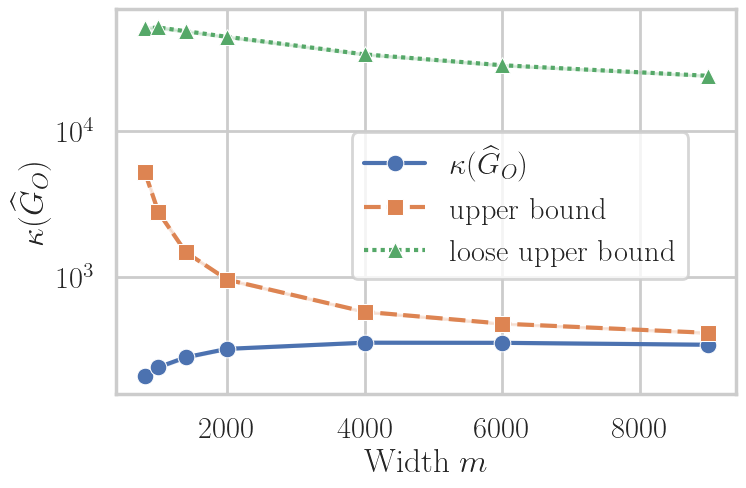

In [131]:
filename = 'Leaky_ReLU_MNIST_whitened_comparison_width'
title = ''
leg_loc = (0.38,0.3)

make_LeakyReLU_width_comparison(df_leakyrelu_MNIST, title, leg_loc=leg_loc, filename=filename, save=True)

In [132]:
file_name1 = 'outer_prod_hessian_information_initialization_experiments_LeakyReLU_Cifar10_whitened_num_init=3_n=500.pkl'
file_name2 = 'outer_prod_hessian_information_initialization_experiments_LeakyReLU_Cifar10_whitened_num_init=3_n=500_2.pkl'
file_name3 = 'outer_prod_hessian_information_initialization_experiments_LeakyReLU_Cifar10_whitened_num_init=3_n=500_3.pkl'

df1 = load_pandas_df(file_path, file_name1)
df2 = load_pandas_df(file_path, file_name2)
df3 = load_pandas_df(file_path, file_name3)

df_leakyrelu_Cifar10 = pd.concat([df1,df2,df3])

df_leakyrelu_Cifar10 = filter_bound_3_out(df_leakyrelu_Cifar10)

# df_lin = filter_bound_2_3_out(df)
df_leakyrelu_Cifar10


dataset network  cond_cov_xx  input_dim  output_dim  width  depth  \
0   cifar-10    FCNN          1.0       3072          10   1500    1.0   
1   cifar-10    FCNN          1.0       3072          10   1500    1.0   
2   cifar-10    FCNN          1.0       3072          10   1500    1.0   
3   cifar-10    FCNN          1.0       3072          10   1500    1.0   
4   cifar-10    FCNN          1.0       3072          10   1500    1.0   
..       ...     ...          ...        ...         ...    ...    ...   
13  cifar-10    FCNN          1.0       3072          10   9000    1.0   
14  cifar-10    FCNN          1.0       3072          10   9000    1.0   
15  cifar-10    FCNN          1.0       3072          10   9000    1.0   
16  cifar-10    FCNN          1.0       3072          10   9000    1.0   
17  cifar-10    FCNN          1.0       3072          10   9000    1.0   

       activ_f  epoch                     type         value  alpha  
0   leaky_relu    0.0  $\kappa(\widehat{G}_O)$     92.008260   0.01  
1   leaky_relu    0.0              upper bound   1370.904944   0.01  
2   leaky_relu    0.0        loose upper bound  24335.155472   0.01  
3   leaky_relu    0.0  $\kappa(\widehat{G}_O)$     89.480866   0.01  
4   leaky_relu    0.0              upper bound   1318.659116   0.01  
..         ...    ...                      ...           ...    ...  
13  leaky_relu    0.0              upper bound    418.497038   0.01  
14  leaky_relu    0.0        loose upper bound  20645.063362   0.01  
15  leaky_relu    0.0  $\kappa(\widehat{G}_O)$    229.666034   0.01  
16  leaky_relu    0.0              upper bound    417.662452   0.01  
17  leaky_relu    0.0        loose upper bound  20613.924831   0.01  

[72 rows x 12 columns]

/var/folders/yz/pp0mnv4s6qb6j8z0xkgwpdmr0000gq/T/ipykernel_35195/4134258939.py:4: UserWarning: The markers list has more values (5) than needed (3), which may not be intended.
  g = sns.lineplot(df, x='width', y='value', hue='type', style='type', markers=markers)


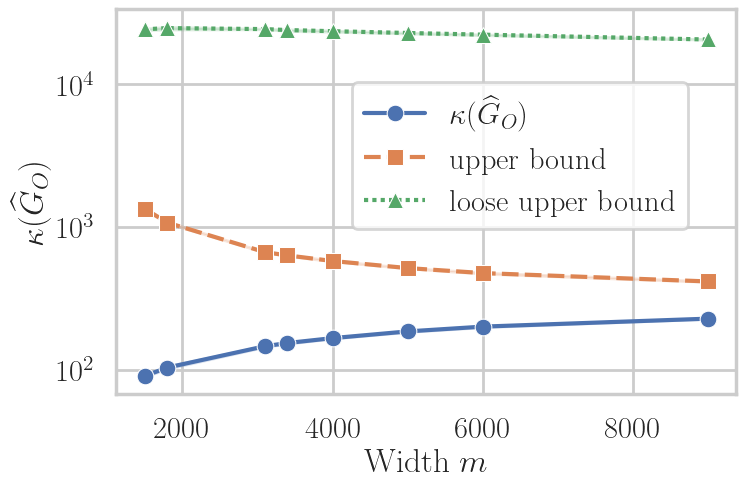

In [133]:
# sns.set(rc={'figure.figsize':(5,5)})

filename = 'Leaky_ReLU_Cifar10_whitened_comparison_width'
title = ''
leg_loc = (0.38,0.43)

make_LeakyReLU_width_comparison(df_leakyrelu_Cifar10, title, leg_loc, filename=filename, save=True)

##### Leaky ReLU 2

In [135]:
file_name = 'outer_prod_hessian_information_initialization_experiments_effect_of_leakyReLU_alpha=0.0_num_init=3_MNIST_whitened_n=500_d=784_test2.pkl'
df1 = load_pandas_df(file_path, file_name)

file_name = 'outer_prod_hessian_information_initialization_experiments_effect_of_leakyReLU_alpha=0.1_num_init=3_MNIST_whitened_n=500_d=784_test2.pkl'
df2 = load_pandas_df(file_path, file_name)

file_name = 'outer_prod_hessian_information_initialization_experiments_effect_of_leakyReLU_alpha=0.3_num_init=3_MNIST_whitened_n=500_d=784_test2.pkl'
df3 = load_pandas_df(file_path, file_name)

file_name = 'outer_prod_hessian_information_initialization_experiments_effect_of_leakyReLU_alpha=0.5_num_init=3_MNIST_whitened_n=500_d=784_test2.pkl'
df4 = load_pandas_df(file_path, file_name)

file_name = 'outer_prod_hessian_information_initialization_experiments_effect_of_leakyReLU_alpha=1_num_init=3_MNIST_whitened_n=500_d=784_test2.pkl'
df5 = load_pandas_df(file_path, file_name)



df = pd.concat([df1,df2,df3,df4,df5])

df_leakyrelu_MNIST = filter_bound_2_3_out(df)
df_leakyrelu_MNIST = filter_bound_1_out(df_leakyrelu_MNIST)

df_leakyrelu_MNIST

dataset network  cond_cov_xx  input_dim  output_dim  width  depth  \
0   mnist    FCNN     1.000001        784          10   1000      1   
2   mnist    FCNN     1.000001        784          10   2000      1   
4   mnist    FCNN     1.000001        784          10   3000      1   
6   mnist    FCNN     1.000001        784          10   5000      1   
0   mnist    FCNN     1.000001        784          10   1000      1   
2   mnist    FCNN     1.000001        784          10   2000      1   
4   mnist    FCNN     1.000001        784          10   3000      1   
6   mnist    FCNN     1.000001        784          10   5000      1   
0   mnist    FCNN     1.000001        784          10   1000      1   
2   mnist    FCNN     1.000001        784          10   3000      1   
4   mnist    FCNN     1.000001        784          10   5000      1   
0   mnist    FCNN     1.000001        784          10   1000      1   
2   mnist    FCNN     1.000001        784          10   2000      1   
4   mnist    FCNN     1.000001        784          10   3000      1   
6   mnist    FCNN     1.000001        784          10   5000      1   
0   mnist    FCNN     1.000001        784          10   1000      1   
2   mnist    FCNN     1.000001        784          10   2000      1   
4   mnist    FCNN     1.000001        784          10   3000      1   
6   mnist    FCNN     1.000001        784          10   5000      1   

      activ_f  epoch                     type       value  alpha  
0  leaky_relu    0.0  $\kappa(\widehat{G}_O)$  226.775087    0.0  
2  leaky_relu    0.0  $\kappa(\widehat{G}_O)$  314.513344    0.0  
4  leaky_relu    0.0  $\kappa(\widehat{G}_O)$  336.551848    0.0  
6  leaky_relu    0.0  $\kappa(\widehat{G}_O)$  342.413045    0.0  
0  leaky_relu    0.0  $\kappa(\widehat{G}_O)$  273.404196    0.1  
2  leaky_relu    0.0  $\kappa(\widehat{G}_O)$  388.200894    0.1  
4  leaky_relu    0.0  $\kappa(\widehat{G}_O)$  422.021649    0.1  
6  leaky_relu    0.0  $\kappa(\widehat{G}_O)$  437.234961    0.1  
0  leaky_relu    0.0  $\kappa(\widehat{G}_O)$  357.568951    0.3  
2  leaky_relu    0.0  $\kappa(\widehat{G}_O)$  599.505456    0.3  
4  leaky_relu    0.0  $\kappa(\widehat{G}_O)$  638.850725    0.3  
0  leaky_relu    0.0  $\kappa(\widehat{G}_O)$  413.451529    0.5  
2  leaky_relu    0.0  $\kappa(\widehat{G}_O)$  643.869408    0.5  
4  leaky_relu    0.0  $\kappa(\widehat{G}_O)$  748.490275    0.5  
6  leaky_relu    0.0  $\kappa(\widehat{G}_O)$  815.940614    0.5  
0  leaky_relu    0.0  $\kappa(\widehat{G}_O)$  453.482545    1.0  
2  leaky_relu    0.0  $\kappa(\widehat{G}_O)$  736.267794    1.0  
4  leaky_relu    0.0  $\kappa(\widehat{G}_O)$  875.149262    1.0  
6  leaky_relu    0.0  $\kappa(\widehat{G}_O)$  997.065699    1.0

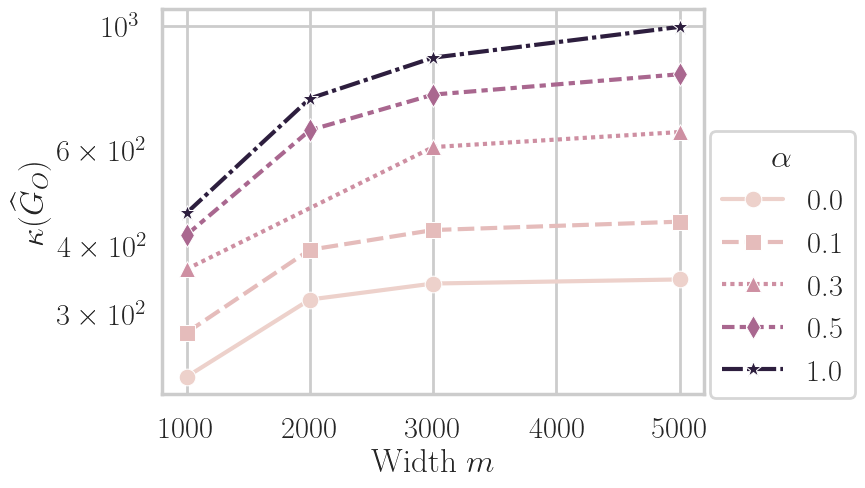

In [137]:
f = plt.figure(figsize=(7,5))
g = sns.lineplot(df_leakyrelu_MNIST, x='width', y='value', alpha = 1, hue='alpha', style='alpha', markers=markers)
g.set(yscale='log')
g.set_xlabel('Width $m$')
g.set_ylabel('$\kappa(\widehat{G}_O)$')

plt.legend(title=r'$\alpha$', loc=(1.01,-0.01))
plt.title(title)

# if save:
f.savefig('LeakyReLU_comparison_alpha.pdf', bbox_inches='tight')

#### Convex vs. Max Bound 

In [146]:
file_name = 'outer_prod_hessian_information_initialization_experiments_downsampled_MNIST_whitened_num_init=10_d=196_n=50000_convex_comb_vs_max_bound_fixed_width.pkl'
df_conv_vs_max = load_pandas_df(file_path, file_name)

df_conv_vs_max = df_conv_vs_max[df_conv_vs_max['type']== 'H_o_cond']

df_conv_vs_max['l'] += 1

In [147]:
df_conv_vs_max = df_conv_vs_max[df_conv_vs_max['width']==300]

In [148]:
alpha = df_conv_vs_max['alpha_l']
alpha
sum(alpha[0:1])

0.652645974060597

In [149]:
alpha[2:4]

6    0.732385
9    0.058340
Name: alpha_l, dtype: float64

In [150]:
sum(alpha[-24:-16])

0.49249287280407766

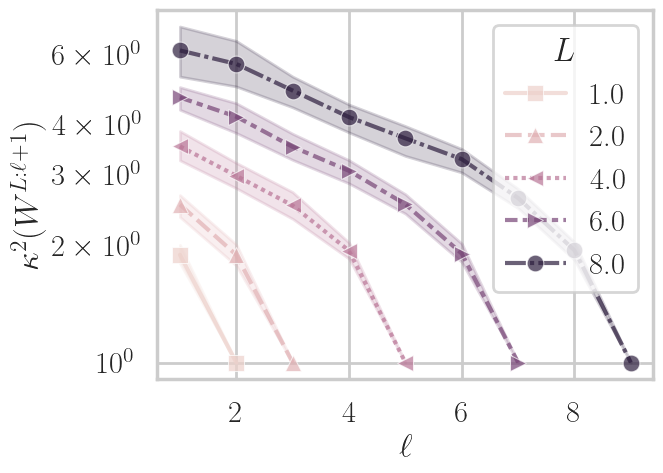

In [151]:
# f = plt.figure(figsize=(8,5))
g = sns.lineplot(df_conv_vs_max,x='l', y='kappa_1', alpha=0.7, hue='depth', style='depth', markers=['s','^','<','>','o'])
g.set(yscale='log')

g.set_xlabel('$\ell$')
g.set_ylabel('$\kappa^2(W^{L:\ell+1})$')
g.legend(title='$L$')

plt.savefig('figures_paper/' + 'kappa^2(W_L_ell+1).pdf', bbox_inches='tight')

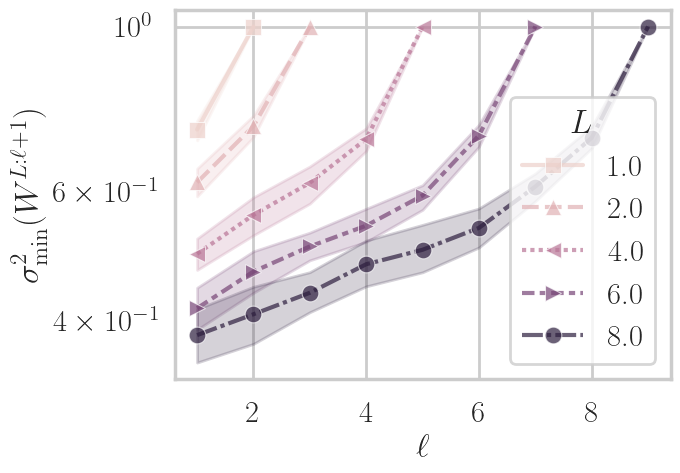

In [152]:
g = sns.lineplot(df_conv_vs_max,x='l', y='alpha_l1', alpha=0.7, hue='depth', style='depth', markers=['s','^','<','>','o'])
g.set(yscale='log')

g.set_xlabel('$\ell$')
g.set_ylabel('$\sigma^2_{\min}(W^{L:\ell+1})$')
g.legend(title='$L$')

plt.savefig('figures_paper/' + 'sigma^2_min(W_L_ell+1).pdf', bbox_inches='tight')

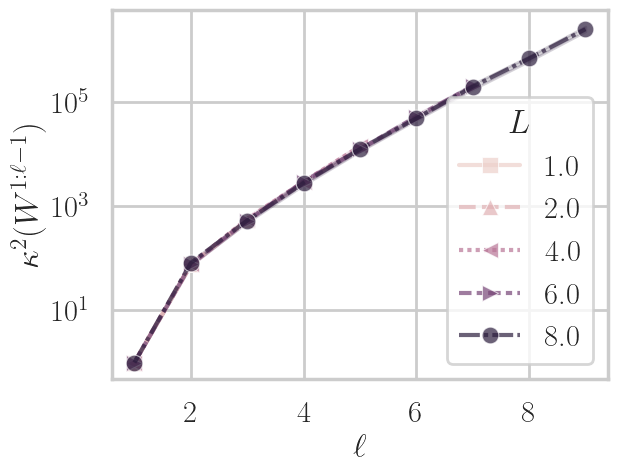

In [153]:
g = sns.lineplot(df_conv_vs_max,x='l', y='kappa_2', alpha=0.7, hue='depth', style='depth', markers=['s','^','<','>','o'])
g.set(yscale='log')

g.set_xlabel('$\ell$')
g.set_ylabel('$\kappa^2(W^{1:\ell-1})$')
g.legend(title='$L$')

plt.savefig('figures_paper/' + 'kappa^2(W_1_ell-1).pdf', bbox_inches='tight')

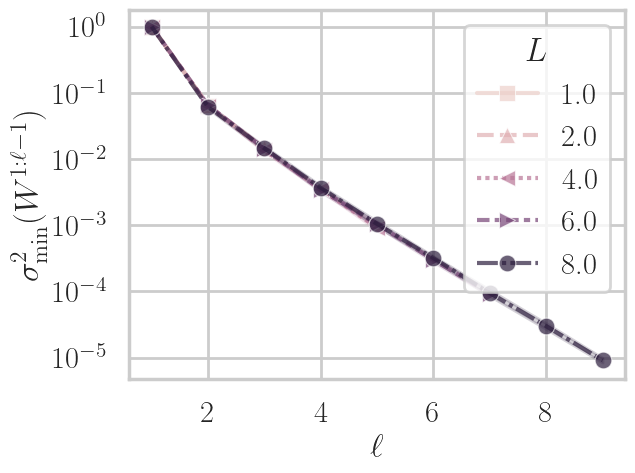

In [154]:
g = sns.lineplot(df_conv_vs_max,x='l', y='alpha_l2', alpha=0.7, hue='depth', style='depth', markers=['s','^','<','>','o'])
g.set(yscale='log')

g.set_xlabel('$\ell$')
g.set_ylabel('$\sigma^2_{\min}(W^{1:\ell-1})$')
g.legend(title='$L$')

plt.savefig('figures_paper/' + 'sigma^2_min(W_1_ell-1).pdf', bbox_inches='tight')

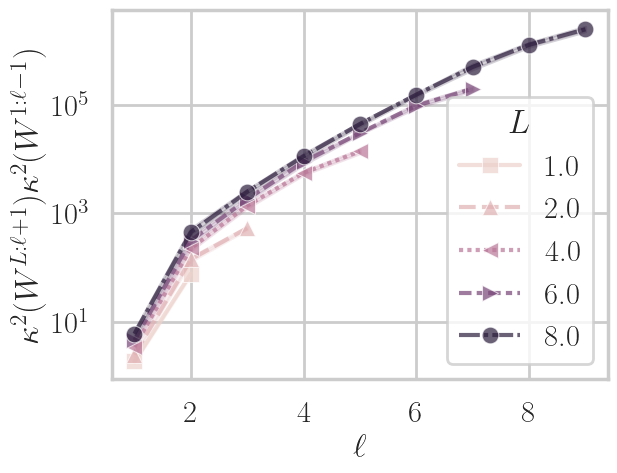

In [155]:
g = sns.lineplot(df_conv_vs_max,x='l', y='kappa', alpha=0.7, hue='depth', style='depth', markers=['s','^','<','>','o'])
g.set(yscale='log')

g.set_xlabel('$\ell$')
g.set_ylabel('$\kappa^2(W^{L:\ell+1})\kappa^2(W^{1:\ell-1})$')
g.legend(title='$L$')

plt.savefig('figures_paper/' + 'kappa^2(W_L_ell+1)kappa^2(W_1_ell-1).pdf', bbox_inches='tight')

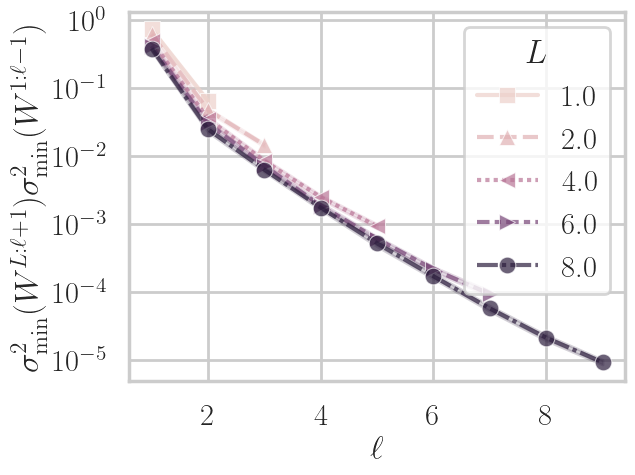

In [156]:
g = sns.lineplot(df_conv_vs_max,x='l', y='alpha_l', alpha=0.7, hue='depth', style='depth', markers=['s','^','<','>','o'])
g.set(yscale='log')

g.set_xlabel('$\ell$')
g.set_ylabel('$\sigma^2_{\min}(W^{L:\ell+1})\sigma^2_{\min}(W^{1:\ell-1})$')
g.legend(title='$L$')

plt.savefig('figures_paper/' + 'sigma^2_min(W_L:ell+1)sigma^2_min(W_1:ell-1).pdf', bbox_inches='tight')

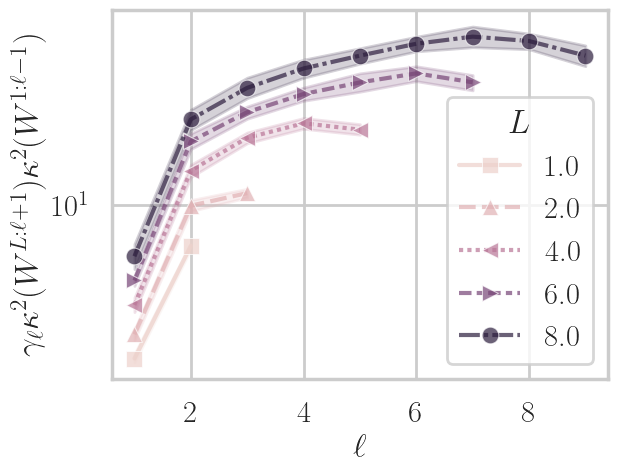

In [157]:
g = sns.lineplot(df_conv_vs_max,x='l', y='alpha_l*kappa/sum_alpha_l', alpha=0.7, hue='depth', style='depth', markers=['s','^','<','>','o'])
g.set(yscale='log')

g.set_xlabel('$\ell$')
# g.set_ylabel(r'$\frac$')
g.set_ylabel(r'$\gamma_{\ell} \kappa^2(W^{L:\ell+1}) \kappa^2(W^{1:\ell-1})$')
g.legend(title='$L$')

plt.savefig('figures_paper/' + 'gamma_ell_kappa^2(W_L:ell+1)_kappa^2(W_1:ell-1).pdf', bbox_inches='tight')

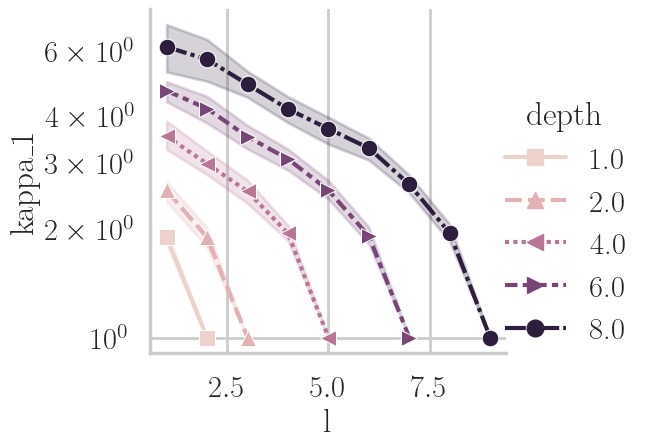

In [158]:
g = sns.relplot(df_conv_vs_max,x='l', y='kappa_1',hue='depth', kind='line', style='depth', markers=['s','^','<','>','o'])
g.set(yscale='log')